# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographic_density']
N_COMPONENTS = 3

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.continuous, source=Source.all, past=Past.last_bin, durl=Durl.all)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = substitution.features(feature,
                                                                sentence_relative='median')
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'source': source,
                         'source_rel': source_rel,
                         'destination': destination,
                         'destination_rel': destination_rel,
                         'h0': substitution.feature_average(feature),
                         'h0_rel': substitution.feature_average(feature,
                                                                sentence_relative='median'),
                         'h0n': substitution.feature_average(feature,
                                                             source_synonyms=True),
                         'h0n_rel': substitution.feature_average(feature,
                                                                 source_synonyms=True,
                                                                 sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 57703 substitutions for model Model(time=Time.continuous, source=Source.all, past=Past.last_bin, durl=Durl.all)


  0% (    1 of 57703) |          | Elapsed Time: 0:00:25 ETA:  16 days, 20:42:45

  0% (   87 of 57703) |                    | Elapsed Time: 0:00:26 ETA:  0:10:50

  0% (  173 of 57703) |                    | Elapsed Time: 0:00:27 ETA:  0:10:50

  0% (  249 of 57703) |                    | Elapsed Time: 0:00:28 ETA:  0:11:16

  0% (  324 of 57703) |                    | Elapsed Time: 0:00:29 ETA:  0:11:31

  0% (  401 of 57703) |                    | Elapsed Time: 0:00:30 ETA:  0:11:36

  0% (  480 of 57703) |                    | Elapsed Time: 0:00:31 ETA:  0:11:36

  0% (  559 of 57703) |                    | Elapsed Time: 0:00:32 ETA:  0:11:36

  1% (  638 of 57703) |                    | Elapsed Time: 0:00:33 ETA:  0:11:36

  1% (  722 of 57703) |                    | Elapsed Time: 0:00:34 ETA:  0:11:44

  1% (  799 of 57703) |                    | Elapsed Time: 0:00:35 ETA:  0:11:53

  1% (  877 of 57703) |                    | Elapsed Time: 0:00:36 ETA:  0:11:50

  1% (  957 of 57703) |                    | Elapsed Time: 0:00:37 ETA:  0:11:43

  1% ( 1036 of 57703) |                    | Elapsed Time: 0:00:38 ETA:  0:11:40

  1% ( 1117 of 57703) |                    | Elapsed Time: 0:00:39 ETA:  0:11:37

  2% ( 1198 of 57703) |                    | Elapsed Time: 0:00:40 ETA:  0:11:34

  2% ( 1278 of 57703) |                    | Elapsed Time: 0:00:41 ETA:  0:11:31

  2% ( 1360 of 57703) |                    | Elapsed Time: 0:00:42 ETA:  0:11:25

  2% ( 1443 of 57703) |                    | Elapsed Time: 0:00:43 ETA:  0:11:20

  2% ( 1528 of 57703) |                    | Elapsed Time: 0:00:44 ETA:  0:11:11

  2% ( 1609 of 57703) |                    | Elapsed Time: 0:00:45 ETA:  0:11:08

  2% ( 1687 of 57703) |                    | Elapsed Time: 0:00:46 ETA:  0:11:08

  3% ( 1758 of 57703) |                    | Elapsed Time: 0:00:47 ETA:  0:11:18

  3% ( 1825 of 57703) |                    | Elapsed Time: 0:00:48 ETA:  0:11:34

  3% ( 1893 of 57703) |                    | Elapsed Time: 0:00:49 ETA:  0:11:48

  3% ( 1961 of 57703) |                    | Elapsed Time: 0:00:50 ETA:  0:12:05

  3% ( 2030 of 57703) |                    | Elapsed Time: 0:00:51 ETA:  0:12:19

  3% ( 2098 of 57703) |                    | Elapsed Time: 0:00:52 ETA:  0:12:24

  3% ( 2164 of 57703) |                    | Elapsed Time: 0:00:53 ETA:  0:12:41

  3% ( 2237 of 57703) |                    | Elapsed Time: 0:00:54 ETA:  0:12:50

  4% ( 2314 of 57703) |                    | Elapsed Time: 0:00:55 ETA:  0:12:50

  4% ( 2391 of 57703) |                    | Elapsed Time: 0:00:56 ETA:  0:12:41

  4% ( 2468 of 57703) |                    | Elapsed Time: 0:00:57 ETA:  0:12:27

  4% ( 2546 of 57703) |                    | Elapsed Time: 0:00:58 ETA:  0:12:14

  4% ( 2624 of 57703) |                    | Elapsed Time: 0:00:59 ETA:  0:12:01

  4% ( 2707 of 57703) |                    | Elapsed Time: 0:01:00 ETA:  0:11:44

  4% ( 2796 of 57703) |                    | Elapsed Time: 0:01:02 ETA:  0:12:31

  5% ( 2886 of 57703) |#                   | Elapsed Time: 0:01:03 ETA:  0:12:15

  5% ( 2970 of 57703) |#                   | Elapsed Time: 0:01:04 ETA:  0:12:05

  5% ( 3056 of 57703) |#                   | Elapsed Time: 0:01:05 ETA:  0:11:54

  5% ( 3142 of 57703) |#                   | Elapsed Time: 0:01:06 ETA:  0:11:42

  5% ( 3229 of 57703) |#                   | Elapsed Time: 0:01:07 ETA:  0:11:31

  5% ( 3316 of 57703) |#                   | Elapsed Time: 0:01:08 ETA:  0:11:21

  5% ( 3403 of 57703) |#                   | Elapsed Time: 0:01:09 ETA:  0:11:16

  6% ( 3490 of 57703) |#                   | Elapsed Time: 0:01:10 ETA:  0:10:05

  6% ( 3577 of 57703) |#                   | Elapsed Time: 0:01:11 ETA:  0:10:01

  6% ( 3607 of 57703) |#                   | Elapsed Time: 0:01:11 ETA:  0:10:00

  6% ( 3693 of 57703) |#                   | Elapsed Time: 0:01:12 ETA:  0:09:58

  6% ( 3782 of 57703) |#                   | Elapsed Time: 0:01:13 ETA:  0:09:54

  6% ( 3870 of 57703) |#                   | Elapsed Time: 0:01:14 ETA:  0:09:51

  6% ( 3956 of 57703) |#                   | Elapsed Time: 0:01:15 ETA:  0:09:51

  6% ( 4036 of 57703) |#                   | Elapsed Time: 0:01:16 ETA:  0:09:56

  7% ( 4119 of 57703) |#                   | Elapsed Time: 0:01:17 ETA:  0:09:59

  7% ( 4201 of 57703) |#                   | Elapsed Time: 0:01:18 ETA:  0:10:02

  7% ( 4283 of 57703) |#                   | Elapsed Time: 0:01:19 ETA:  0:10:06

  7% ( 4328 of 57703) |#                   | Elapsed Time: 0:01:20 ETA:  0:10:08

  7% ( 4410 of 57703) |#                   | Elapsed Time: 0:01:21 ETA:  0:10:10

  7% ( 4492 of 57703) |#                   | Elapsed Time: 0:01:22 ETA:  0:10:16

  7% ( 4573 of 57703) |#                   | Elapsed Time: 0:01:23 ETA:  0:10:22

  8% ( 4655 of 57703) |#                   | Elapsed Time: 0:01:24 ETA:  0:10:26

  8% ( 4739 of 57703) |#                   | Elapsed Time: 0:01:25 ETA:  0:10:21

  8% ( 4822 of 57703) |#                   | Elapsed Time: 0:01:26 ETA:  0:10:20

  8% ( 4902 of 57703) |#                   | Elapsed Time: 0:01:27 ETA:  0:10:20

  8% ( 4982 of 57703) |#                   | Elapsed Time: 0:01:28 ETA:  0:10:22

  8% ( 5050 of 57703) |#                   | Elapsed Time: 0:01:29 ETA:  0:10:22

  8% ( 5124 of 57703) |#                   | Elapsed Time: 0:01:30 ETA:  0:10:29

  9% ( 5198 of 57703) |#                   | Elapsed Time: 0:01:31 ETA:  0:10:36

  9% ( 5276 of 57703) |#                   | Elapsed Time: 0:01:32 ETA:  0:10:39

  9% ( 5344 of 57703) |#                   | Elapsed Time: 0:01:33 ETA:  0:10:53

  9% ( 5415 of 57703) |#                   | Elapsed Time: 0:01:34 ETA:  0:11:06

  9% ( 5486 of 57703) |#                   | Elapsed Time: 0:01:35 ETA:  0:11:19

  9% ( 5556 of 57703) |#                   | Elapsed Time: 0:01:36 ETA:  0:11:31

  9% ( 5630 of 57703) |#                   | Elapsed Time: 0:01:37 ETA:  0:11:37

  9% ( 5704 of 57703) |#                   | Elapsed Time: 0:01:38 ETA:  0:11:42

 10% ( 5771 of 57703) |##                  | Elapsed Time: 0:01:39 ETA:  0:12:01

 10% ( 5835 of 57703) |##                  | Elapsed Time: 0:01:40 ETA:  0:12:19

 10% ( 5900 of 57703) |##                  | Elapsed Time: 0:01:41 ETA:  0:12:21

 10% ( 5967 of 57703) |##                  | Elapsed Time: 0:01:42 ETA:  0:12:27

 10% ( 6034 of 57703) |##                  | Elapsed Time: 0:01:43 ETA:  0:12:32

 10% ( 6111 of 57703) |##                  | Elapsed Time: 0:01:44 ETA:  0:12:19

 10% ( 6196 of 57703) |##                  | Elapsed Time: 0:01:45 ETA:  0:12:02

 10% ( 6273 of 57703) |##                  | Elapsed Time: 0:01:46 ETA:  0:11:57

 10% ( 6347 of 57703) |##                  | Elapsed Time: 0:01:47 ETA:  0:11:38

 11% ( 6375 of 57703) |##                  | Elapsed Time: 0:01:49 ETA:  0:13:20

 11% ( 6445 of 57703) |##                  | Elapsed Time: 0:01:50 ETA:  0:13:11

 11% ( 6492 of 57703) |##                  | Elapsed Time: 0:01:50 ETA:  0:13:05

 11% ( 6564 of 57703) |##                  | Elapsed Time: 0:01:51 ETA:  0:12:56

 11% ( 6641 of 57703) |##                  | Elapsed Time: 0:01:52 ETA:  0:12:41

 11% ( 6718 of 57703) |##                  | Elapsed Time: 0:01:53 ETA:  0:12:40

 11% ( 6796 of 57703) |##                  | Elapsed Time: 0:01:54 ETA:  0:12:49

 11% ( 6881 of 57703) |##                  | Elapsed Time: 0:01:55 ETA:  0:12:36

 12% ( 6968 of 57703) |##                  | Elapsed Time: 0:01:56 ETA:  0:12:17

 12% ( 7044 of 57703) |##                  | Elapsed Time: 0:01:57 ETA:  0:10:34

 12% ( 7119 of 57703) |##                  | Elapsed Time: 0:01:58 ETA:  0:10:26

 12% ( 7197 of 57703) |##                  | Elapsed Time: 0:01:59 ETA:  0:10:20

 12% ( 7213 of 57703) |##                  | Elapsed Time: 0:01:59 ETA:  0:10:13

 12% ( 7289 of 57703) |##                  | Elapsed Time: 0:02:00 ETA:  0:10:14

 12% ( 7364 of 57703) |##                  | Elapsed Time: 0:02:02 ETA:  0:10:15

 12% ( 7442 of 57703) |##                  | Elapsed Time: 0:02:03 ETA:  0:10:14

 13% ( 7520 of 57703) |##                  | Elapsed Time: 0:02:04 ETA:  0:10:21

 13% ( 7598 of 57703) |##                  | Elapsed Time: 0:02:05 ETA:  0:10:31

 13% ( 7677 of 57703) |##                  | Elapsed Time: 0:02:06 ETA:  0:10:27

 13% ( 7757 of 57703) |##                  | Elapsed Time: 0:02:07 ETA:  0:10:20

 13% ( 7837 of 57703) |##                  | Elapsed Time: 0:02:08 ETA:  0:10:18

 13% ( 7917 of 57703) |##                  | Elapsed Time: 0:02:09 ETA:  0:10:14

 13% ( 7935 of 57703) |##                  | Elapsed Time: 0:02:09 ETA:  0:10:11

 13% ( 8014 of 57703) |##                  | Elapsed Time: 0:02:10 ETA:  0:10:05

 14% ( 8093 of 57703) |##                  | Elapsed Time: 0:02:11 ETA:  0:10:03

 14% ( 8172 of 57703) |##                  | Elapsed Time: 0:02:12 ETA:  0:10:00

 14% ( 8251 of 57703) |##                  | Elapsed Time: 0:02:13 ETA:  0:09:59

 14% ( 8328 of 57703) |##                  | Elapsed Time: 0:02:14 ETA:  0:10:00

 14% ( 8406 of 57703) |##                  | Elapsed Time: 0:02:15 ETA:  0:10:01

 14% ( 8484 of 57703) |##                  | Elapsed Time: 0:02:16 ETA:  0:10:01

 14% ( 8561 of 57703) |##                  | Elapsed Time: 0:02:17 ETA:  0:10:03

 14% ( 8638 of 57703) |##                  | Elapsed Time: 0:02:18 ETA:  0:10:03

 15% ( 8656 of 57703) |###                 | Elapsed Time: 0:02:18 ETA:  0:10:04

 15% ( 8734 of 57703) |###                 | Elapsed Time: 0:02:19 ETA:  0:10:04

 15% ( 8812 of 57703) |###                 | Elapsed Time: 0:02:20 ETA:  0:10:05

 15% ( 8889 of 57703) |###                 | Elapsed Time: 0:02:21 ETA:  0:10:06

 15% ( 8966 of 57703) |###                 | Elapsed Time: 0:02:22 ETA:  0:10:05

 15% ( 9043 of 57703) |###                 | Elapsed Time: 0:02:23 ETA:  0:10:05

 15% ( 9120 of 57703) |###                 | Elapsed Time: 0:02:24 ETA:  0:10:05

 15% ( 9199 of 57703) |###                 | Elapsed Time: 0:02:25 ETA:  0:10:02

 16% ( 9283 of 57703) |###                 | Elapsed Time: 0:02:26 ETA:  0:09:53

 16% ( 9377 of 57703) |###                 | Elapsed Time: 0:02:27 ETA:  0:09:47

 16% ( 9459 of 57703) |###                 | Elapsed Time: 0:02:28 ETA:  0:09:41

 16% ( 9539 of 57703) |###                 | Elapsed Time: 0:02:29 ETA:  0:09:37

 16% ( 9622 of 57703) |###                 | Elapsed Time: 0:02:30 ETA:  0:09:30

 16% ( 9704 of 57703) |###                 | Elapsed Time: 0:02:31 ETA:  0:09:24

 16% ( 9786 of 57703) |###                 | Elapsed Time: 0:02:32 ETA:  0:09:17

 17% ( 9869 of 57703) |###                 | Elapsed Time: 0:02:33 ETA:  0:09:12

 17% ( 9952 of 57703) |###                 | Elapsed Time: 0:02:34 ETA:  0:09:12

 17% (10035 of 57703) |###                 | Elapsed Time: 0:02:35 ETA:  0:09:10

 17% (10099 of 57703) |###                 | Elapsed Time: 0:02:36 ETA:  0:09:08

 17% (10181 of 57703) |###                 | Elapsed Time: 0:02:37 ETA:  0:09:07

 17% (10260 of 57703) |###                 | Elapsed Time: 0:02:38 ETA:  0:09:07

 17% (10339 of 57703) |###                 | Elapsed Time: 0:02:39 ETA:  0:09:09

 18% (10421 of 57703) |###                 | Elapsed Time: 0:02:40 ETA:  0:09:08

 18% (10500 of 57703) |###                 | Elapsed Time: 0:02:41 ETA:  0:09:10

 18% (10580 of 57703) |###                 | Elapsed Time: 0:02:42 ETA:  0:09:12

 18% (10662 of 57703) |###                 | Elapsed Time: 0:02:43 ETA:  0:09:12

 18% (10743 of 57703) |###                 | Elapsed Time: 0:02:44 ETA:  0:09:14

 18% (10820 of 57703) |###                 | Elapsed Time: 0:02:46 ETA:  0:11:20

 18% (10895 of 57703) |###                 | Elapsed Time: 0:02:47 ETA:  0:11:24

 19% (10974 of 57703) |###                 | Elapsed Time: 0:02:48 ETA:  0:11:24

 19% (11053 of 57703) |###                 | Elapsed Time: 0:02:49 ETA:  0:11:27

 19% (11135 of 57703) |###                 | Elapsed Time: 0:02:50 ETA:  0:11:22

 19% (11217 of 57703) |###                 | Elapsed Time: 0:02:52 ETA:  0:11:18

 19% (11296 of 57703) |###                 | Elapsed Time: 0:02:53 ETA:  0:11:21

 19% (11376 of 57703) |###                 | Elapsed Time: 0:02:54 ETA:  0:11:21

 19% (11460 of 57703) |###                 | Elapsed Time: 0:02:55 ETA:  0:09:11

 20% (11541 of 57703) |####                | Elapsed Time: 0:02:56 ETA:  0:09:07

 20% (11625 of 57703) |####                | Elapsed Time: 0:02:57 ETA:  0:08:58

 20% (11707 of 57703) |####                | Elapsed Time: 0:02:58 ETA:  0:08:54

 20% (11789 of 57703) |####                | Elapsed Time: 0:02:59 ETA:  0:08:49

 20% (11869 of 57703) |####                | Elapsed Time: 0:03:00 ETA:  0:08:50

 20% (11953 of 57703) |####                | Elapsed Time: 0:03:01 ETA:  0:08:47

 20% (12037 of 57703) |####                | Elapsed Time: 0:03:02 ETA:  0:08:41

 21% (12120 of 57703) |####                | Elapsed Time: 0:03:03 ETA:  0:08:37

 21% (12204 of 57703) |####                | Elapsed Time: 0:03:04 ETA:  0:08:36

 21% (12262 of 57703) |####                | Elapsed Time: 0:03:04 ETA:  0:08:34

 21% (12347 of 57703) |####                | Elapsed Time: 0:03:05 ETA:  0:08:32

 21% (12430 of 57703) |####                | Elapsed Time: 0:03:06 ETA:  0:08:30

 21% (12514 of 57703) |####                | Elapsed Time: 0:03:07 ETA:  0:08:28

 21% (12596 of 57703) |####                | Elapsed Time: 0:03:08 ETA:  0:08:25

 21% (12678 of 57703) |####                | Elapsed Time: 0:03:09 ETA:  0:08:26

 22% (12759 of 57703) |####                | Elapsed Time: 0:03:10 ETA:  0:08:28

 22% (12840 of 57703) |####                | Elapsed Time: 0:03:11 ETA:  0:08:29

 22% (12918 of 57703) |####                | Elapsed Time: 0:03:12 ETA:  0:08:34

 22% (12984 of 57703) |####                | Elapsed Time: 0:03:13 ETA:  0:08:36

 22% (13063 of 57703) |####                | Elapsed Time: 0:03:14 ETA:  0:08:40

 22% (13138 of 57703) |####                | Elapsed Time: 0:03:15 ETA:  0:08:47

 22% (13211 of 57703) |####                | Elapsed Time: 0:03:16 ETA:  0:08:57

 23% (13285 of 57703) |####                | Elapsed Time: 0:03:17 ETA:  0:09:05

 23% (13359 of 57703) |####                | Elapsed Time: 0:03:18 ETA:  0:09:12

 23% (13433 of 57703) |####                | Elapsed Time: 0:03:19 ETA:  0:09:19

 23% (13506 of 57703) |####                | Elapsed Time: 0:03:20 ETA:  0:09:27

 23% (13585 of 57703) |####                | Elapsed Time: 0:03:21 ETA:  0:09:25

 23% (13663 of 57703) |####                | Elapsed Time: 0:03:22 ETA:  0:09:26

 23% (13705 of 57703) |####                | Elapsed Time: 0:03:23 ETA:  0:09:30

 23% (13784 of 57703) |####                | Elapsed Time: 0:03:24 ETA:  0:09:25

 24% (13859 of 57703) |####                | Elapsed Time: 0:03:25 ETA:  0:09:22

 24% (13935 of 57703) |####                | Elapsed Time: 0:03:26 ETA:  0:09:18

 24% (14011 of 57703) |####                | Elapsed Time: 0:03:27 ETA:  0:09:14

 24% (14087 of 57703) |####                | Elapsed Time: 0:03:28 ETA:  0:09:11

 24% (14161 of 57703) |####                | Elapsed Time: 0:03:29 ETA:  0:09:10

 24% (14242 of 57703) |####                | Elapsed Time: 0:03:30 ETA:  0:09:06

 24% (14324 of 57703) |####                | Elapsed Time: 0:03:31 ETA:  0:09:01

 24% (14405 of 57703) |####                | Elapsed Time: 0:03:32 ETA:  0:08:55

 25% (14426 of 57703) |#####               | Elapsed Time: 0:03:32 ETA:  0:08:55

 25% (14508 of 57703) |#####               | Elapsed Time: 0:03:33 ETA:  0:08:45

 25% (14585 of 57703) |#####               | Elapsed Time: 0:03:34 ETA:  0:08:43

 25% (14668 of 57703) |#####               | Elapsed Time: 0:03:35 ETA:  0:08:33

 25% (14751 of 57703) |#####               | Elapsed Time: 0:03:36 ETA:  0:08:25

 25% (14835 of 57703) |#####               | Elapsed Time: 0:03:37 ETA:  0:08:13

 25% (14919 of 57703) |#####               | Elapsed Time: 0:03:38 ETA:  0:08:09

 26% (15004 of 57703) |#####               | Elapsed Time: 0:03:39 ETA:  0:08:05

 26% (15088 of 57703) |#####               | Elapsed Time: 0:03:40 ETA:  0:08:01

 26% (15148 of 57703) |#####               | Elapsed Time: 0:03:41 ETA:  0:07:59

 26% (15232 of 57703) |#####               | Elapsed Time: 0:03:42 ETA:  0:07:56

 26% (15314 of 57703) |#####               | Elapsed Time: 0:03:43 ETA:  0:07:51

 26% (15389 of 57703) |#####               | Elapsed Time: 0:03:44 ETA:  0:07:57

 26% (15465 of 57703) |#####               | Elapsed Time: 0:03:45 ETA:  0:08:03

 26% (15541 of 57703) |#####               | Elapsed Time: 0:03:46 ETA:  0:08:10

 27% (15616 of 57703) |#####               | Elapsed Time: 0:03:47 ETA:  0:08:18

 27% (15693 of 57703) |#####               | Elapsed Time: 0:03:48 ETA:  0:08:25

 27% (15774 of 57703) |#####               | Elapsed Time: 0:03:49 ETA:  0:08:27

 27% (15869 of 57703) |#####               | Elapsed Time: 0:03:50 ETA:  0:08:33

 27% (15947 of 57703) |#####               | Elapsed Time: 0:03:51 ETA:  0:08:37

 27% (16026 of 57703) |#####               | Elapsed Time: 0:03:52 ETA:  0:08:32

 27% (16103 of 57703) |#####               | Elapsed Time: 0:03:53 ETA:  0:08:30

 28% (16182 of 57703) |#####               | Elapsed Time: 0:03:54 ETA:  0:08:25

 28% (16259 of 57703) |#####               | Elapsed Time: 0:03:55 ETA:  0:08:21

 28% (16298 of 57703) |#####               | Elapsed Time: 0:03:57 ETA:  0:11:01

 28% (16373 of 57703) |#####               | Elapsed Time: 0:03:58 ETA:  0:11:10

 28% (16448 of 57703) |#####               | Elapsed Time: 0:03:59 ETA:  0:11:18

 28% (16524 of 57703) |#####               | Elapsed Time: 0:04:00 ETA:  0:11:05

 28% (16590 of 57703) |#####               | Elapsed Time: 0:04:01 ETA:  0:11:07

 28% (16667 of 57703) |#####               | Elapsed Time: 0:04:02 ETA:  0:11:08

 29% (16746 of 57703) |#####               | Elapsed Time: 0:04:03 ETA:  0:11:04

 29% (16824 of 57703) |#####               | Elapsed Time: 0:04:04 ETA:  0:11:05

 29% (16908 of 57703) |#####               | Elapsed Time: 0:04:05 ETA:  0:10:55

 29% (16993 of 57703) |#####               | Elapsed Time: 0:04:06 ETA:  0:08:14

 29% (17077 of 57703) |#####               | Elapsed Time: 0:04:07 ETA:  0:08:03

 29% (17162 of 57703) |#####               | Elapsed Time: 0:04:08 ETA:  0:07:51

 29% (17247 of 57703) |#####               | Elapsed Time: 0:04:09 ETA:  0:07:41

 30% (17311 of 57703) |######              | Elapsed Time: 0:04:10 ETA:  0:07:34

 30% (17395 of 57703) |######              | Elapsed Time: 0:04:11 ETA:  0:07:26

 30% (17480 of 57703) |######              | Elapsed Time: 0:04:12 ETA:  0:07:20

 30% (17565 of 57703) |######              | Elapsed Time: 0:04:13 ETA:  0:07:12

 30% (17652 of 57703) |######              | Elapsed Time: 0:04:14 ETA:  0:07:09

 30% (17737 of 57703) |######              | Elapsed Time: 0:04:15 ETA:  0:07:08

 30% (17823 of 57703) |######              | Elapsed Time: 0:04:16 ETA:  0:07:05

 31% (17908 of 57703) |######              | Elapsed Time: 0:04:17 ETA:  0:07:04

 31% (17993 of 57703) |######              | Elapsed Time: 0:04:18 ETA:  0:07:02

 31% (18033 of 57703) |######              | Elapsed Time: 0:04:19 ETA:  0:07:02

 31% (18118 of 57703) |######              | Elapsed Time: 0:04:20 ETA:  0:07:00

 31% (18202 of 57703) |######              | Elapsed Time: 0:04:21 ETA:  0:06:59

 31% (18283 of 57703) |######              | Elapsed Time: 0:04:22 ETA:  0:07:02

 31% (18363 of 57703) |######              | Elapsed Time: 0:04:23 ETA:  0:07:08

 31% (18452 of 57703) |######              | Elapsed Time: 0:04:24 ETA:  0:07:02

 32% (18535 of 57703) |######              | Elapsed Time: 0:04:25 ETA:  0:07:04

 32% (18608 of 57703) |######              | Elapsed Time: 0:04:26 ETA:  0:07:15

 32% (18687 of 57703) |######              | Elapsed Time: 0:04:27 ETA:  0:07:20

 32% (18754 of 57703) |######              | Elapsed Time: 0:04:27 ETA:  0:07:25

 32% (18833 of 57703) |######              | Elapsed Time: 0:04:28 ETA:  0:07:30

 32% (18915 of 57703) |######              | Elapsed Time: 0:04:29 ETA:  0:07:32

 32% (18995 of 57703) |######              | Elapsed Time: 0:04:30 ETA:  0:07:32

 33% (19080 of 57703) |######              | Elapsed Time: 0:04:31 ETA:  0:07:25

 33% (19164 of 57703) |######              | Elapsed Time: 0:04:32 ETA:  0:07:30

 33% (19240 of 57703) |######              | Elapsed Time: 0:04:33 ETA:  0:07:36

 33% (19323 of 57703) |######              | Elapsed Time: 0:04:34 ETA:  0:07:25

 33% (19407 of 57703) |######              | Elapsed Time: 0:04:35 ETA:  0:07:19

 33% (19475 of 57703) |######              | Elapsed Time: 0:04:36 ETA:  0:07:11

 33% (19559 of 57703) |######              | Elapsed Time: 0:04:37 ETA:  0:07:05

 34% (19642 of 57703) |######              | Elapsed Time: 0:04:38 ETA:  0:07:03

 34% (19728 of 57703) |######              | Elapsed Time: 0:04:39 ETA:  0:06:56

 34% (19809 of 57703) |######              | Elapsed Time: 0:04:40 ETA:  0:07:00

 34% (19886 of 57703) |######              | Elapsed Time: 0:04:41 ETA:  0:07:05

 34% (19971 of 57703) |######              | Elapsed Time: 0:04:42 ETA:  0:06:56

 34% (20048 of 57703) |######              | Elapsed Time: 0:04:43 ETA:  0:07:00

 34% (20131 of 57703) |######              | Elapsed Time: 0:04:44 ETA:  0:07:01

 35% (20197 of 57703) |#######             | Elapsed Time: 0:04:45 ETA:  0:07:05

 35% (20275 of 57703) |#######             | Elapsed Time: 0:04:46 ETA:  0:07:10

 35% (20351 of 57703) |#######             | Elapsed Time: 0:04:47 ETA:  0:07:16

 35% (20426 of 57703) |#######             | Elapsed Time: 0:04:48 ETA:  0:07:26

 35% (20505 of 57703) |#######             | Elapsed Time: 0:04:49 ETA:  0:07:27

 35% (20586 of 57703) |#######             | Elapsed Time: 0:04:50 ETA:  0:07:22

 35% (20667 of 57703) |#######             | Elapsed Time: 0:04:51 ETA:  0:07:25

 35% (20751 of 57703) |#######             | Elapsed Time: 0:04:52 ETA:  0:07:17

 36% (20825 of 57703) |#######             | Elapsed Time: 0:04:53 ETA:  0:07:24

 36% (20918 of 57703) |#######             | Elapsed Time: 0:04:54 ETA:  0:07:18

 36% (21000 of 57703) |#######             | Elapsed Time: 0:04:55 ETA:  0:07:11

 36% (21086 of 57703) |#######             | Elapsed Time: 0:04:56 ETA:  0:06:57

 36% (21172 of 57703) |#######             | Elapsed Time: 0:04:57 ETA:  0:06:49

 36% (21258 of 57703) |#######             | Elapsed Time: 0:04:58 ETA:  0:06:42

 36% (21344 of 57703) |#######             | Elapsed Time: 0:04:59 ETA:  0:06:36

 37% (21423 of 57703) |#######             | Elapsed Time: 0:05:00 ETA:  0:06:40

 37% (21500 of 57703) |#######             | Elapsed Time: 0:05:01 ETA:  0:06:35

 37% (21586 of 57703) |#######             | Elapsed Time: 0:05:02 ETA:  0:06:31

 37% (21639 of 57703) |#######             | Elapsed Time: 0:05:03 ETA:  0:06:29

 37% (21724 of 57703) |#######             | Elapsed Time: 0:05:04 ETA:  0:06:24

 37% (21805 of 57703) |#######             | Elapsed Time: 0:05:05 ETA:  0:06:28

 37% (21867 of 57703) |#######             | Elapsed Time: 0:05:06 ETA:  0:06:51

 38% (21939 of 57703) |#######             | Elapsed Time: 0:05:07 ETA:  0:07:06

 38% (22018 of 57703) |#######             | Elapsed Time: 0:05:08 ETA:  0:07:13

 38% (22094 of 57703) |#######             | Elapsed Time: 0:05:09 ETA:  0:07:16

 38% (22172 of 57703) |#######             | Elapsed Time: 0:05:10 ETA:  0:07:15

 38% (22250 of 57703) |#######             | Elapsed Time: 0:05:11 ETA:  0:07:22

 38% (22330 of 57703) |#######             | Elapsed Time: 0:05:12 ETA:  0:07:25

 38% (22360 of 57703) |#######             | Elapsed Time: 0:05:13 ETA:  0:07:35

 38% (22440 of 57703) |#######             | Elapsed Time: 0:05:14 ETA:  0:07:35

 39% (22518 of 57703) |#######             | Elapsed Time: 0:05:15 ETA:  0:07:15

 39% (22597 of 57703) |#######             | Elapsed Time: 0:05:16 ETA:  0:07:06

 39% (22677 of 57703) |#######             | Elapsed Time: 0:05:17 ETA:  0:07:03

 39% (22751 of 57703) |#######             | Elapsed Time: 0:05:18 ETA:  0:07:05

 39% (22829 of 57703) |#######             | Elapsed Time: 0:05:19 ETA:  0:07:03

 39% (22913 of 57703) |#######             | Elapsed Time: 0:05:20 ETA:  0:06:55

 39% (22995 of 57703) |#######             | Elapsed Time: 0:05:21 ETA:  0:06:51

 39% (23034 of 57703) |#######             | Elapsed Time: 0:05:23 ETA:  0:09:51

 40% (23082 of 57703) |########            | Elapsed Time: 0:05:24 ETA:  0:10:04

 40% (23160 of 57703) |########            | Elapsed Time: 0:05:25 ETA:  0:10:04

 40% (23237 of 57703) |########            | Elapsed Time: 0:05:26 ETA:  0:10:05

 40% (23313 of 57703) |########            | Elapsed Time: 0:05:27 ETA:  0:10:10

 40% (23388 of 57703) |########            | Elapsed Time: 0:05:28 ETA:  0:10:08

 40% (23467 of 57703) |########            | Elapsed Time: 0:05:29 ETA:  0:10:05

 40% (23539 of 57703) |########            | Elapsed Time: 0:05:30 ETA:  0:10:22

 40% (23611 of 57703) |########            | Elapsed Time: 0:05:31 ETA:  0:10:37

 41% (23683 of 57703) |########            | Elapsed Time: 0:05:32 ETA:  0:07:20

 41% (23759 of 57703) |########            | Elapsed Time: 0:05:33 ETA:  0:07:18

 41% (23803 of 57703) |########            | Elapsed Time: 0:05:33 ETA:  0:07:18

 41% (23885 of 57703) |########            | Elapsed Time: 0:05:34 ETA:  0:07:11

 41% (23970 of 57703) |########            | Elapsed Time: 0:05:35 ETA:  0:07:00

 41% (24053 of 57703) |########            | Elapsed Time: 0:05:36 ETA:  0:06:49

 41% (24138 of 57703) |########            | Elapsed Time: 0:05:37 ETA:  0:06:42

 41% (24219 of 57703) |########            | Elapsed Time: 0:05:38 ETA:  0:06:31

 42% (24299 of 57703) |########            | Elapsed Time: 0:05:40 ETA:  0:06:22

 42% (24378 of 57703) |########            | Elapsed Time: 0:05:41 ETA:  0:06:14

 42% (24455 of 57703) |########            | Elapsed Time: 0:05:42 ETA:  0:06:12

 42% (24524 of 57703) |########            | Elapsed Time: 0:05:42 ETA:  0:06:11

 42% (24602 of 57703) |########            | Elapsed Time: 0:05:43 ETA:  0:06:13

 42% (24682 of 57703) |########            | Elapsed Time: 0:05:44 ETA:  0:06:17

 42% (24766 of 57703) |########            | Elapsed Time: 0:05:45 ETA:  0:06:15

 43% (24851 of 57703) |########            | Elapsed Time: 0:05:46 ETA:  0:06:14

 43% (24935 of 57703) |########            | Elapsed Time: 0:05:47 ETA:  0:06:10

 43% (25018 of 57703) |########            | Elapsed Time: 0:05:48 ETA:  0:06:06

 43% (25102 of 57703) |########            | Elapsed Time: 0:05:49 ETA:  0:06:00

 43% (25186 of 57703) |########            | Elapsed Time: 0:05:50 ETA:  0:05:52

 43% (25246 of 57703) |########            | Elapsed Time: 0:05:51 ETA:  0:05:49

 43% (25328 of 57703) |########            | Elapsed Time: 0:05:52 ETA:  0:05:45

 44% (25406 of 57703) |########            | Elapsed Time: 0:05:53 ETA:  0:05:46

 44% (25485 of 57703) |########            | Elapsed Time: 0:05:54 ETA:  0:05:50

 44% (25563 of 57703) |########            | Elapsed Time: 0:05:55 ETA:  0:05:56

 44% (25641 of 57703) |########            | Elapsed Time: 0:05:56 ETA:  0:06:01

 44% (25719 of 57703) |########            | Elapsed Time: 0:05:57 ETA:  0:06:05

 44% (25800 of 57703) |########            | Elapsed Time: 0:05:58 ETA:  0:06:07

 44% (25884 of 57703) |########            | Elapsed Time: 0:05:59 ETA:  0:06:06

 45% (25967 of 57703) |#########           | Elapsed Time: 0:06:00 ETA:  0:06:11

 45% (26044 of 57703) |#########           | Elapsed Time: 0:06:01 ETA:  0:06:11

 45% (26121 of 57703) |#########           | Elapsed Time: 0:06:02 ETA:  0:06:12

 45% (26198 of 57703) |#########           | Elapsed Time: 0:06:03 ETA:  0:06:13

 45% (26281 of 57703) |#########           | Elapsed Time: 0:06:04 ETA:  0:06:06

 45% (26360 of 57703) |#########           | Elapsed Time: 0:06:05 ETA:  0:06:04

 45% (26439 of 57703) |#########           | Elapsed Time: 0:06:06 ETA:  0:06:06

 45% (26518 of 57703) |#########           | Elapsed Time: 0:06:07 ETA:  0:06:11

 46% (26597 of 57703) |#########           | Elapsed Time: 0:06:08 ETA:  0:06:09

 46% (26688 of 57703) |#########           | Elapsed Time: 0:06:10 ETA:  0:06:06

 46% (26771 of 57703) |#########           | Elapsed Time: 0:06:11 ETA:  0:05:58

 46% (26857 of 57703) |#########           | Elapsed Time: 0:06:12 ETA:  0:05:47

 46% (26942 of 57703) |#########           | Elapsed Time: 0:06:13 ETA:  0:05:43

 46% (27026 of 57703) |#########           | Elapsed Time: 0:06:14 ETA:  0:05:36

 46% (27093 of 57703) |#########           | Elapsed Time: 0:06:15 ETA:  0:05:49

 47% (27168 of 57703) |#########           | Elapsed Time: 0:06:16 ETA:  0:05:53

 47% (27244 of 57703) |#########           | Elapsed Time: 0:06:17 ETA:  0:05:55

 47% (27318 of 57703) |#########           | Elapsed Time: 0:06:18 ETA:  0:06:00

 47% (27392 of 57703) |#########           | Elapsed Time: 0:06:19 ETA:  0:06:04

 47% (27409 of 57703) |#########           | Elapsed Time: 0:06:19 ETA:  0:06:10

 47% (27485 of 57703) |#########           | Elapsed Time: 0:06:20 ETA:  0:06:22

 47% (27567 of 57703) |#########           | Elapsed Time: 0:06:21 ETA:  0:06:25

 47% (27656 of 57703) |#########           | Elapsed Time: 0:06:22 ETA:  0:06:17

 48% (27733 of 57703) |#########           | Elapsed Time: 0:06:23 ETA:  0:06:04

 48% (27809 of 57703) |#########           | Elapsed Time: 0:06:24 ETA:  0:06:02

 48% (27892 of 57703) |#########           | Elapsed Time: 0:06:25 ETA:  0:05:53

 48% (27977 of 57703) |#########           | Elapsed Time: 0:06:26 ETA:  0:05:39

 48% (28063 of 57703) |#########           | Elapsed Time: 0:06:27 ETA:  0:05:25

 48% (28131 of 57703) |#########           | Elapsed Time: 0:06:28 ETA:  0:05:20

 48% (28216 of 57703) |#########           | Elapsed Time: 0:06:29 ETA:  0:05:10

 49% (28292 of 57703) |#########           | Elapsed Time: 0:06:30 ETA:  0:05:16

 49% (28376 of 57703) |#########           | Elapsed Time: 0:06:31 ETA:  0:05:19

 49% (28459 of 57703) |#########           | Elapsed Time: 0:06:32 ETA:  0:05:12

 49% (28535 of 57703) |#########           | Elapsed Time: 0:06:33 ETA:  0:05:10

 49% (28615 of 57703) |#########           | Elapsed Time: 0:06:34 ETA:  0:05:13

 49% (28696 of 57703) |#########           | Elapsed Time: 0:06:35 ETA:  0:05:15

 49% (28781 of 57703) |#########           | Elapsed Time: 0:06:36 ETA:  0:05:15

 50% (28852 of 57703) |##########          | Elapsed Time: 0:06:37 ETA:  0:05:16

 50% (28934 of 57703) |##########          | Elapsed Time: 0:06:38 ETA:  0:05:18

 50% (29009 of 57703) |##########          | Elapsed Time: 0:06:39 ETA:  0:05:18

 50% (29085 of 57703) |##########          | Elapsed Time: 0:06:40 ETA:  0:05:25

 50% (29151 of 57703) |##########          | Elapsed Time: 0:06:41 ETA:  0:05:42

 50% (29233 of 57703) |##########          | Elapsed Time: 0:06:42 ETA:  0:05:35

 50% (29312 of 57703) |##########          | Elapsed Time: 0:06:43 ETA:  0:05:34

 50% (29395 of 57703) |##########          | Elapsed Time: 0:06:44 ETA:  0:05:32

 51% (29479 of 57703) |##########          | Elapsed Time: 0:06:45 ETA:  0:05:32

 51% (29573 of 57703) |##########          | Elapsed Time: 0:06:46 ETA:  0:05:31

 51% (29655 of 57703) |##########          | Elapsed Time: 0:06:47 ETA:  0:05:21

 51% (29731 of 57703) |##########          | Elapsed Time: 0:06:48 ETA:  0:05:20

 51% (29809 of 57703) |##########          | Elapsed Time: 0:06:49 ETA:  0:05:06

 51% (29892 of 57703) |##########          | Elapsed Time: 0:06:50 ETA:  0:05:03

 51% (29974 of 57703) |##########          | Elapsed Time: 0:06:51 ETA:  0:04:59

 52% (30055 of 57703) |##########          | Elapsed Time: 0:06:52 ETA:  0:04:59

 52% (30135 of 57703) |##########          | Elapsed Time: 0:06:53 ETA:  0:05:02

 52% (30214 of 57703) |##########          | Elapsed Time: 0:06:54 ETA:  0:05:06

 52% (30295 of 57703) |##########          | Elapsed Time: 0:06:55 ETA:  0:05:01

 52% (30381 of 57703) |##########          | Elapsed Time: 0:06:56 ETA:  0:04:56

 52% (30467 of 57703) |##########          | Elapsed Time: 0:06:57 ETA:  0:04:46

 52% (30553 of 57703) |##########          | Elapsed Time: 0:06:58 ETA:  0:04:38

 53% (30638 of 57703) |##########          | Elapsed Time: 0:06:59 ETA:  0:04:35

 53% (30724 of 57703) |##########          | Elapsed Time: 0:07:00 ETA:  0:04:31

 53% (30808 of 57703) |##########          | Elapsed Time: 0:07:01 ETA:  0:04:27

 53% (30892 of 57703) |##########          | Elapsed Time: 0:07:02 ETA:  0:04:23

 53% (30978 of 57703) |##########          | Elapsed Time: 0:07:03 ETA:  0:04:16

 53% (31016 of 57703) |##########          | Elapsed Time: 0:07:03 ETA:  0:04:16

 53% (31096 of 57703) |##########          | Elapsed Time: 0:07:04 ETA:  0:04:21

 54% (31167 of 57703) |##########          | Elapsed Time: 0:07:05 ETA:  0:04:34

 54% (31243 of 57703) |##########          | Elapsed Time: 0:07:06 ETA:  0:04:44

 54% (31324 of 57703) |##########          | Elapsed Time: 0:07:07 ETA:  0:04:47

 54% (31353 of 57703) |##########          | Elapsed Time: 0:07:10 ETA:  0:09:06

 54% (31422 of 57703) |##########          | Elapsed Time: 0:07:11 ETA:  0:09:29

 54% (31486 of 57703) |##########          | Elapsed Time: 0:07:12 ETA:  0:10:02

 54% (31546 of 57703) |##########          | Elapsed Time: 0:07:13 ETA:  0:10:48

 54% (31609 of 57703) |##########          | Elapsed Time: 0:07:14 ETA:  0:10:56

 54% (31682 of 57703) |##########          | Elapsed Time: 0:07:15 ETA:  0:11:08

 55% (31737 of 57703) |###########         | Elapsed Time: 0:07:16 ETA:  0:11:02

 55% (31821 of 57703) |###########         | Elapsed Time: 0:07:17 ETA:  0:10:46

 55% (31894 of 57703) |###########         | Elapsed Time: 0:07:18 ETA:  0:11:00

 55% (31969 of 57703) |###########         | Elapsed Time: 0:07:19 ETA:  0:06:16

 55% (32051 of 57703) |###########         | Elapsed Time: 0:07:20 ETA:  0:05:58

 55% (32135 of 57703) |###########         | Elapsed Time: 0:07:21 ETA:  0:05:32

 55% (32219 of 57703) |###########         | Elapsed Time: 0:07:22 ETA:  0:05:03

 55% (32302 of 57703) |###########         | Elapsed Time: 0:07:23 ETA:  0:04:40

 56% (32386 of 57703) |###########         | Elapsed Time: 0:07:24 ETA:  0:04:27

 56% (32458 of 57703) |###########         | Elapsed Time: 0:07:25 ETA:  0:04:31

 56% (32543 of 57703) |###########         | Elapsed Time: 0:07:26 ETA:  0:04:28

 56% (32615 of 57703) |###########         | Elapsed Time: 0:07:27 ETA:  0:04:28

 56% (32691 of 57703) |###########         | Elapsed Time: 0:07:28 ETA:  0:04:26

 56% (32774 of 57703) |###########         | Elapsed Time: 0:07:29 ETA:  0:04:24

 56% (32859 of 57703) |###########         | Elapsed Time: 0:07:30 ETA:  0:04:22

 57% (32941 of 57703) |###########         | Elapsed Time: 0:07:31 ETA:  0:04:23

 57% (33025 of 57703) |###########         | Elapsed Time: 0:07:32 ETA:  0:04:22

 57% (33105 of 57703) |###########         | Elapsed Time: 0:07:33 ETA:  0:04:25

 57% (33180 of 57703) |###########         | Elapsed Time: 0:07:34 ETA:  0:04:24

 57% (33259 of 57703) |###########         | Elapsed Time: 0:07:35 ETA:  0:04:30

 57% (33342 of 57703) |###########         | Elapsed Time: 0:07:36 ETA:  0:04:18

 57% (33424 of 57703) |###########         | Elapsed Time: 0:07:37 ETA:  0:04:11

 58% (33510 of 57703) |###########         | Elapsed Time: 0:07:38 ETA:  0:04:07

 58% (33587 of 57703) |###########         | Elapsed Time: 0:07:39 ETA:  0:04:14

 58% (33670 of 57703) |###########         | Elapsed Time: 0:07:40 ETA:  0:04:12

 58% (33753 of 57703) |###########         | Elapsed Time: 0:07:41 ETA:  0:04:11

 58% (33841 of 57703) |###########         | Elapsed Time: 0:07:42 ETA:  0:04:03

 58% (33901 of 57703) |###########         | Elapsed Time: 0:07:43 ETA:  0:03:59

 58% (33988 of 57703) |###########         | Elapsed Time: 0:07:44 ETA:  0:03:50

 59% (34075 of 57703) |###########         | Elapsed Time: 0:07:45 ETA:  0:03:44

 59% (34159 of 57703) |###########         | Elapsed Time: 0:07:46 ETA:  0:03:42

 59% (34231 of 57703) |###########         | Elapsed Time: 0:07:47 ETA:  0:03:54

 59% (34317 of 57703) |###########         | Elapsed Time: 0:07:48 ETA:  0:03:44

 59% (34397 of 57703) |###########         | Elapsed Time: 0:07:49 ETA:  0:03:47

 59% (34474 of 57703) |###########         | Elapsed Time: 0:07:50 ETA:  0:03:52

 59% (34560 of 57703) |###########         | Elapsed Time: 0:07:51 ETA:  0:03:53

 60% (34622 of 57703) |############        | Elapsed Time: 0:07:52 ETA:  0:03:50

 60% (34702 of 57703) |############        | Elapsed Time: 0:07:53 ETA:  0:03:56

 60% (34783 of 57703) |############        | Elapsed Time: 0:07:54 ETA:  0:04:02

 60% (34858 of 57703) |############        | Elapsed Time: 0:07:55 ETA:  0:04:10

 60% (34938 of 57703) |############        | Elapsed Time: 0:07:56 ETA:  0:04:01

 60% (35021 of 57703) |############        | Elapsed Time: 0:07:57 ETA:  0:04:03

 60% (35104 of 57703) |############        | Elapsed Time: 0:07:58 ETA:  0:03:59

 60% (35177 of 57703) |############        | Elapsed Time: 0:07:59 ETA:  0:04:02

 61% (35259 of 57703) |############        | Elapsed Time: 0:08:00 ETA:  0:04:05

 61% (35344 of 57703) |############        | Elapsed Time: 0:08:01 ETA:  0:04:04

 61% (35429 of 57703) |############        | Elapsed Time: 0:08:02 ETA:  0:03:59

 61% (35511 of 57703) |############        | Elapsed Time: 0:08:03 ETA:  0:03:50

 61% (35591 of 57703) |############        | Elapsed Time: 0:08:04 ETA:  0:03:48

 61% (35676 of 57703) |############        | Elapsed Time: 0:08:05 ETA:  0:03:45

 61% (35757 of 57703) |############        | Elapsed Time: 0:08:06 ETA:  0:03:46

 62% (35838 of 57703) |############        | Elapsed Time: 0:08:07 ETA:  0:03:37

 62% (35920 of 57703) |############        | Elapsed Time: 0:08:08 ETA:  0:03:35

 62% (36002 of 57703) |############        | Elapsed Time: 0:08:09 ETA:  0:03:36

 62% (36065 of 57703) |############        | Elapsed Time: 0:08:10 ETA:  0:03:34

 62% (36147 of 57703) |############        | Elapsed Time: 0:08:11 ETA:  0:03:36

 62% (36230 of 57703) |############        | Elapsed Time: 0:08:12 ETA:  0:03:34

 62% (36301 of 57703) |############        | Elapsed Time: 0:08:13 ETA:  0:03:42

 63% (36374 of 57703) |############        | Elapsed Time: 0:08:14 ETA:  0:03:53

 63% (36450 of 57703) |############        | Elapsed Time: 0:08:15 ETA:  0:03:57

 63% (36514 of 57703) |############        | Elapsed Time: 0:08:16 ETA:  0:04:15

 63% (36597 of 57703) |############        | Elapsed Time: 0:08:17 ETA:  0:04:13

 63% (36675 of 57703) |############        | Elapsed Time: 0:08:18 ETA:  0:04:16

 63% (36755 of 57703) |############        | Elapsed Time: 0:08:19 ETA:  0:04:18

 63% (36786 of 57703) |############        | Elapsed Time: 0:08:19 ETA:  0:04:22

 63% (36868 of 57703) |############        | Elapsed Time: 0:08:20 ETA:  0:04:22

 64% (36953 of 57703) |############        | Elapsed Time: 0:08:21 ETA:  0:04:04

 64% (37035 of 57703) |############        | Elapsed Time: 0:08:22 ETA:  0:03:54

 64% (37110 of 57703) |############        | Elapsed Time: 0:08:23 ETA:  0:03:54

 64% (37188 of 57703) |############        | Elapsed Time: 0:08:24 ETA:  0:03:37

 64% (37267 of 57703) |############        | Elapsed Time: 0:08:25 ETA:  0:03:41

 64% (37355 of 57703) |############        | Elapsed Time: 0:08:26 ETA:  0:03:29

 64% (37438 of 57703) |############        | Elapsed Time: 0:08:27 ETA:  0:03:24

 65% (37507 of 57703) |#############       | Elapsed Time: 0:08:28 ETA:  0:03:21

 65% (37591 of 57703) |#############       | Elapsed Time: 0:08:29 ETA:  0:03:17

 65% (37677 of 57703) |#############       | Elapsed Time: 0:08:30 ETA:  0:03:16

 65% (37763 of 57703) |#############       | Elapsed Time: 0:08:31 ETA:  0:03:10

 65% (37848 of 57703) |#############       | Elapsed Time: 0:08:32 ETA:  0:03:00

 65% (37929 of 57703) |#############       | Elapsed Time: 0:08:33 ETA:  0:02:56

 65% (38013 of 57703) |#############       | Elapsed Time: 0:08:34 ETA:  0:02:50

 66% (38094 of 57703) |#############       | Elapsed Time: 0:08:35 ETA:  0:02:56

 66% (38173 of 57703) |#############       | Elapsed Time: 0:08:36 ETA:  0:03:00

 66% (38229 of 57703) |#############       | Elapsed Time: 0:08:37 ETA:  0:02:58

 66% (38309 of 57703) |#############       | Elapsed Time: 0:08:38 ETA:  0:03:02

 66% (38392 of 57703) |#############       | Elapsed Time: 0:08:39 ETA:  0:03:04

 66% (38480 of 57703) |#############       | Elapsed Time: 0:08:40 ETA:  0:03:01

 66% (38565 of 57703) |#############       | Elapsed Time: 0:08:41 ETA:  0:03:00

 66% (38648 of 57703) |#############       | Elapsed Time: 0:08:42 ETA:  0:02:57

 67% (38731 of 57703) |#############       | Elapsed Time: 0:08:43 ETA:  0:02:57

 67% (38808 of 57703) |#############       | Elapsed Time: 0:08:44 ETA:  0:02:59

 67% (38884 of 57703) |#############       | Elapsed Time: 0:08:45 ETA:  0:03:00

 67% (38950 of 57703) |#############       | Elapsed Time: 0:08:45 ETA:  0:03:03

 67% (39030 of 57703) |#############       | Elapsed Time: 0:08:46 ETA:  0:03:02

 67% (39104 of 57703) |#############       | Elapsed Time: 0:08:47 ETA:  0:03:09

 67% (39185 of 57703) |#############       | Elapsed Time: 0:08:48 ETA:  0:03:16

 68% (39267 of 57703) |#############       | Elapsed Time: 0:08:49 ETA:  0:03:18

 68% (39348 of 57703) |#############       | Elapsed Time: 0:08:50 ETA:  0:03:19

 68% (39430 of 57703) |#############       | Elapsed Time: 0:08:51 ETA:  0:03:20

 68% (39512 of 57703) |#############       | Elapsed Time: 0:08:52 ETA:  0:03:14

 68% (39585 of 57703) |#############       | Elapsed Time: 0:08:53 ETA:  0:03:16

 68% (39653 of 57703) |#############       | Elapsed Time: 0:08:54 ETA:  0:03:29

 68% (39671 of 57703) |#############       | Elapsed Time: 0:08:55 ETA:  0:03:34

 68% (39756 of 57703) |#############       | Elapsed Time: 0:08:56 ETA:  0:03:21

 69% (39841 of 57703) |#############       | Elapsed Time: 0:08:57 ETA:  0:03:16

 69% (39923 of 57703) |#############       | Elapsed Time: 0:08:58 ETA:  0:03:15

 69% (40007 of 57703) |#############       | Elapsed Time: 0:08:59 ETA:  0:03:11

 69% (40091 of 57703) |#############       | Elapsed Time: 0:09:00 ETA:  0:03:08

 69% (40168 of 57703) |#############       | Elapsed Time: 0:09:01 ETA:  0:03:13

 69% (40249 of 57703) |#############       | Elapsed Time: 0:09:02 ETA:  0:03:03

 69% (40329 of 57703) |#############       | Elapsed Time: 0:09:03 ETA:  0:02:48

 70% (40393 of 57703) |##############      | Elapsed Time: 0:09:04 ETA:  0:02:48

 70% (40472 of 57703) |##############      | Elapsed Time: 0:09:05 ETA:  0:02:53

 70% (40556 of 57703) |##############      | Elapsed Time: 0:09:06 ETA:  0:02:52

 70% (40636 of 57703) |##############      | Elapsed Time: 0:09:07 ETA:  0:02:53

 70% (40719 of 57703) |##############      | Elapsed Time: 0:09:08 ETA:  0:02:53

 70% (40802 of 57703) |##############      | Elapsed Time: 0:09:09 ETA:  0:02:53

 70% (40885 of 57703) |##############      | Elapsed Time: 0:09:10 ETA:  0:02:45

 70% (40966 of 57703) |##############      | Elapsed Time: 0:09:11 ETA:  0:02:43

 71% (41049 of 57703) |##############      | Elapsed Time: 0:09:12 ETA:  0:02:40

 71% (41114 of 57703) |##############      | Elapsed Time: 0:09:12 ETA:  0:02:33

 71% (41198 of 57703) |##############      | Elapsed Time: 0:09:13 ETA:  0:02:27

 71% (41276 of 57703) |##############      | Elapsed Time: 0:09:14 ETA:  0:02:32

 71% (41356 of 57703) |##############      | Elapsed Time: 0:09:15 ETA:  0:02:31

 71% (41436 of 57703) |##############      | Elapsed Time: 0:09:17 ETA:  0:02:33

 71% (41516 of 57703) |##############      | Elapsed Time: 0:09:18 ETA:  0:02:35

 72% (41596 of 57703) |##############      | Elapsed Time: 0:09:19 ETA:  0:02:38

 72% (41616 of 57703) |##############      | Elapsed Time: 0:09:22 ETA:  0:07:45

 72% (41693 of 57703) |##############      | Elapsed Time: 0:09:23 ETA:  0:07:54

 72% (41772 of 57703) |##############      | Elapsed Time: 0:09:24 ETA:  0:07:50

 72% (41835 of 57703) |##############      | Elapsed Time: 0:09:25 ETA:  0:08:03

 72% (41919 of 57703) |##############      | Elapsed Time: 0:09:26 ETA:  0:07:52

 72% (41995 of 57703) |##############      | Elapsed Time: 0:09:27 ETA:  0:07:57

 72% (42077 of 57703) |##############      | Elapsed Time: 0:09:28 ETA:  0:07:53

 73% (42154 of 57703) |##############      | Elapsed Time: 0:09:29 ETA:  0:07:57

 73% (42238 of 57703) |##############      | Elapsed Time: 0:09:30 ETA:  0:07:50

 73% (42324 of 57703) |##############      | Elapsed Time: 0:09:31 ETA:  0:02:28

 73% (42413 of 57703) |##############      | Elapsed Time: 0:09:32 ETA:  0:02:15

 73% (42498 of 57703) |##############      | Elapsed Time: 0:09:33 ETA:  0:02:08

 73% (42556 of 57703) |##############      | Elapsed Time: 0:09:34 ETA:  0:02:07

 73% (42638 of 57703) |##############      | Elapsed Time: 0:09:35 ETA:  0:02:07

 74% (42718 of 57703) |##############      | Elapsed Time: 0:09:36 ETA:  0:02:03

 74% (42804 of 57703) |##############      | Elapsed Time: 0:09:37 ETA:  0:01:57

 74% (42875 of 57703) |##############      | Elapsed Time: 0:09:38 ETA:  0:02:02

 74% (42956 of 57703) |##############      | Elapsed Time: 0:09:39 ETA:  0:02:04

 74% (43041 of 57703) |##############      | Elapsed Time: 0:09:40 ETA:  0:02:04

 74% (43124 of 57703) |##############      | Elapsed Time: 0:09:41 ETA:  0:02:08

 74% (43200 of 57703) |##############      | Elapsed Time: 0:09:42 ETA:  0:02:16

 75% (43278 of 57703) |###############     | Elapsed Time: 0:09:43 ETA:  0:02:14

 75% (43362 of 57703) |###############     | Elapsed Time: 0:09:44 ETA:  0:02:11

 75% (43445 of 57703) |###############     | Elapsed Time: 0:09:45 ETA:  0:02:07

 75% (43518 of 57703) |###############     | Elapsed Time: 0:09:46 ETA:  0:02:19

 75% (43594 of 57703) |###############     | Elapsed Time: 0:09:47 ETA:  0:02:13

 75% (43674 of 57703) |###############     | Elapsed Time: 0:09:48 ETA:  0:02:13

 75% (43755 of 57703) |###############     | Elapsed Time: 0:09:49 ETA:  0:02:16

 75% (43835 of 57703) |###############     | Elapsed Time: 0:09:50 ETA:  0:02:18

 76% (43914 of 57703) |###############     | Elapsed Time: 0:09:51 ETA:  0:02:14

 76% (43999 of 57703) |###############     | Elapsed Time: 0:09:52 ETA:  0:02:27

 76% (44081 of 57703) |###############     | Elapsed Time: 0:09:53 ETA:  0:02:28

 76% (44163 of 57703) |###############     | Elapsed Time: 0:09:54 ETA:  0:02:17

 76% (44241 of 57703) |###############     | Elapsed Time: 0:09:55 ETA:  0:02:13

 76% (44320 of 57703) |###############     | Elapsed Time: 0:09:56 ETA:  0:02:14

 76% (44404 of 57703) |###############     | Elapsed Time: 0:09:57 ETA:  0:02:09

 77% (44486 of 57703) |###############     | Elapsed Time: 0:09:58 ETA:  0:02:06

 77% (44571 of 57703) |###############     | Elapsed Time: 0:09:59 ETA:  0:01:59

 77% (44645 of 57703) |###############     | Elapsed Time: 0:10:00 ETA:  0:01:58

 77% (44720 of 57703) |###############     | Elapsed Time: 0:10:01 ETA:  0:01:59

 77% (44803 of 57703) |###############     | Elapsed Time: 0:10:02 ETA:  0:01:57

 77% (44883 of 57703) |###############     | Elapsed Time: 0:10:03 ETA:  0:01:57

 77% (44966 of 57703) |###############     | Elapsed Time: 0:10:04 ETA:  0:01:51

 78% (45047 of 57703) |###############     | Elapsed Time: 0:10:05 ETA:  0:01:47

 78% (45127 of 57703) |###############     | Elapsed Time: 0:10:06 ETA:  0:01:50

 78% (45203 of 57703) |###############     | Elapsed Time: 0:10:07 ETA:  0:01:55

 78% (45283 of 57703) |###############     | Elapsed Time: 0:10:08 ETA:  0:02:00

 78% (45364 of 57703) |###############     | Elapsed Time: 0:10:09 ETA:  0:01:51

 78% (45442 of 57703) |###############     | Elapsed Time: 0:10:10 ETA:  0:01:51

 78% (45528 of 57703) |###############     | Elapsed Time: 0:10:11 ETA:  0:01:47

 79% (45616 of 57703) |###############     | Elapsed Time: 0:10:12 ETA:  0:01:38

 79% (45693 of 57703) |###############     | Elapsed Time: 0:10:13 ETA:  0:01:44

 79% (45766 of 57703) |###############     | Elapsed Time: 0:10:14 ETA:  0:01:50

 79% (45847 of 57703) |###############     | Elapsed Time: 0:10:15 ETA:  0:01:49

 79% (45924 of 57703) |###############     | Elapsed Time: 0:10:16 ETA:  0:01:47

 79% (46012 of 57703) |###############     | Elapsed Time: 0:10:17 ETA:  0:01:38

 79% (46097 of 57703) |###############     | Elapsed Time: 0:10:18 ETA:  0:01:33

 80% (46163 of 57703) |################    | Elapsed Time: 0:10:19 ETA:  0:01:32

 80% (46245 of 57703) |################    | Elapsed Time: 0:10:20 ETA:  0:01:35

 80% (46326 of 57703) |################    | Elapsed Time: 0:10:21 ETA:  0:01:41

 80% (46400 of 57703) |################    | Elapsed Time: 0:10:22 ETA:  0:01:43

 80% (46475 of 57703) |################    | Elapsed Time: 0:10:23 ETA:  0:01:40

 80% (46556 of 57703) |################    | Elapsed Time: 0:10:24 ETA:  0:01:38

 80% (46638 of 57703) |################    | Elapsed Time: 0:10:25 ETA:  0:01:32

 80% (46716 of 57703) |################    | Elapsed Time: 0:10:26 ETA:  0:01:41

 81% (46796 of 57703) |################    | Elapsed Time: 0:10:27 ETA:  0:01:46

 81% (46884 of 57703) |################    | Elapsed Time: 0:10:28 ETA:  0:01:48

 81% (46965 of 57703) |################    | Elapsed Time: 0:10:29 ETA:  0:01:48

 81% (47044 of 57703) |################    | Elapsed Time: 0:10:30 ETA:  0:01:40

 81% (47129 of 57703) |################    | Elapsed Time: 0:10:31 ETA:  0:01:29

 81% (47208 of 57703) |################    | Elapsed Time: 0:10:32 ETA:  0:01:30

 81% (47289 of 57703) |################    | Elapsed Time: 0:10:33 ETA:  0:01:31

 82% (47369 of 57703) |################    | Elapsed Time: 0:10:34 ETA:  0:01:27

 82% (47450 of 57703) |################    | Elapsed Time: 0:10:35 ETA:  0:01:25

 82% (47525 of 57703) |################    | Elapsed Time: 0:10:36 ETA:  0:01:27

 82% (47605 of 57703) |################    | Elapsed Time: 0:10:37 ETA:  0:01:29

 82% (47685 of 57703) |################    | Elapsed Time: 0:10:38 ETA:  0:01:26

 82% (47768 of 57703) |################    | Elapsed Time: 0:10:39 ETA:  0:01:27

 82% (47850 of 57703) |################    | Elapsed Time: 0:10:40 ETA:  0:01:23

 83% (47937 of 57703) |################    | Elapsed Time: 0:10:41 ETA:  0:01:15

 83% (48021 of 57703) |################    | Elapsed Time: 0:10:42 ETA:  0:01:11

 83% (48102 of 57703) |################    | Elapsed Time: 0:10:43 ETA:  0:01:10

 83% (48179 of 57703) |################    | Elapsed Time: 0:10:44 ETA:  0:01:07

 83% (48257 of 57703) |################    | Elapsed Time: 0:10:45 ETA:  0:01:07

 83% (48327 of 57703) |################    | Elapsed Time: 0:10:46 ETA:  0:01:06

 83% (48406 of 57703) |################    | Elapsed Time: 0:10:47 ETA:  0:01:07

 84% (48486 of 57703) |################    | Elapsed Time: 0:10:48 ETA:  0:01:09

 84% (48563 of 57703) |################    | Elapsed Time: 0:10:49 ETA:  0:01:13

 84% (48638 of 57703) |################    | Elapsed Time: 0:10:50 ETA:  0:01:24

 84% (48723 of 57703) |################    | Elapsed Time: 0:10:51 ETA:  0:01:21

 84% (48806 of 57703) |################    | Elapsed Time: 0:10:52 ETA:  0:01:18

 84% (48887 of 57703) |################    | Elapsed Time: 0:10:53 ETA:  0:01:12

 84% (48969 of 57703) |################    | Elapsed Time: 0:10:54 ETA:  0:01:07

 85% (49048 of 57703) |#################   | Elapsed Time: 0:10:55 ETA:  0:01:08

 85% (49128 of 57703) |#################   | Elapsed Time: 0:10:56 ETA:  0:01:06

 85% (49210 of 57703) |#################   | Elapsed Time: 0:10:57 ETA:  0:01:03

 85% (49295 of 57703) |#################   | Elapsed Time: 0:10:58 ETA:  0:00:54

 85% (49375 of 57703) |#################   | Elapsed Time: 0:10:59 ETA:  0:00:49

 85% (49454 of 57703) |#################   | Elapsed Time: 0:11:00 ETA:  0:00:54

 85% (49534 of 57703) |#################   | Elapsed Time: 0:11:01 ETA:  0:00:55

 85% (49615 of 57703) |#################   | Elapsed Time: 0:11:02 ETA:  0:00:55

 86% (49700 of 57703) |#################   | Elapsed Time: 0:11:03 ETA:  0:00:51

 86% (49769 of 57703) |#################   | Elapsed Time: 0:11:04 ETA:  0:00:49

 86% (49858 of 57703) |#################   | Elapsed Time: 0:11:05 ETA:  0:00:39

 86% (49941 of 57703) |#################   | Elapsed Time: 0:11:06 ETA:  0:00:37

 86% (50028 of 57703) |#################   | Elapsed Time: 0:11:07 ETA:  0:00:33

 86% (50110 of 57703) |#################   | Elapsed Time: 0:11:08 ETA:  0:00:31

 86% (50190 of 57703) |#################   | Elapsed Time: 0:11:09 ETA:  0:00:29

 87% (50275 of 57703) |#################   | Elapsed Time: 0:11:10 ETA:  0:00:24

 87% (50362 of 57703) |#################   | Elapsed Time: 0:11:11 ETA:  0:00:17

 87% (50442 of 57703) |#################   | Elapsed Time: 0:11:12 ETA:  0:00:20

 87% (50491 of 57703) |#################   | Elapsed Time: 0:11:13 ETA:  0:00:21

 87% (50572 of 57703) |#################   | Elapsed Time: 0:11:14 ETA:  0:00:27

 87% (50659 of 57703) |#################   | Elapsed Time: 0:11:15 ETA:  0:00:22

 87% (50747 of 57703) |#################   | Elapsed Time: 0:11:16 ETA:  0:00:21

 88% (50830 of 57703) |#################   | Elapsed Time: 0:11:17 ETA:  0:00:19

 88% (50904 of 57703) |#################   | Elapsed Time: 0:11:18 ETA:  0:00:23

 88% (50987 of 57703) |#################   | Elapsed Time: 0:11:19 ETA:  0:00:24

 88% (51066 of 57703) |#################   | Elapsed Time: 0:11:20 ETA:  0:00:31

 88% (51146 of 57703) |#################   | Elapsed Time: 0:11:21 ETA:  0:00:30

 88% (51212 of 57703) |#################   | Elapsed Time: 0:11:22 ETA:  0:00:26

 88% (51281 of 57703) |#################   | Elapsed Time: 0:11:23 ETA:  0:00:37

 89% (51358 of 57703) |#################   | Elapsed Time: 0:11:24 ETA:  0:00:47

 89% (51443 of 57703) |#################   | Elapsed Time: 0:11:25 ETA:  0:00:49

 89% (51521 of 57703) |#################   | Elapsed Time: 0:11:26 ETA:  0:00:53

 89% (51600 of 57703) |#################   | Elapsed Time: 0:11:27 ETA:  0:00:46

 89% (51681 of 57703) |#################   | Elapsed Time: 0:11:28 ETA:  0:00:48

 89% (51760 of 57703) |#################   | Elapsed Time: 0:11:29 ETA:  0:00:47

 89% (51840 of 57703) |#################   | Elapsed Time: 0:11:30 ETA:  0:00:45

 90% (51933 of 57703) |##################  | Elapsed Time: 0:11:31 ETA:  0:00:33

 90% (52011 of 57703) |##################  | Elapsed Time: 0:11:32 ETA:  0:00:32

 90% (52092 of 57703) |##################  | Elapsed Time: 0:11:33 ETA:  0:00:36

 90% (52169 of 57703) |##################  | Elapsed Time: 0:11:34 ETA:  0:00:36

 90% (52248 of 57703) |##################  | Elapsed Time: 0:11:35 ETA:  0:00:35

 90% (52324 of 57703) |##################  | Elapsed Time: 0:11:36 ETA:  0:00:39

 90% (52404 of 57703) |##################  | Elapsed Time: 0:11:37 ETA:  0:00:37

 90% (52481 of 57703) |##################  | Elapsed Time: 0:11:38 ETA:  0:00:40

 91% (52564 of 57703) |##################  | Elapsed Time: 0:11:39 ETA:  0:00:37

 91% (52638 of 57703) |##################  | Elapsed Time: 0:11:40 ETA:  0:00:41

 91% (52654 of 57703) |##################  | Elapsed Time: 0:11:40 ETA:  0:00:43

 91% (52728 of 57703) |##################  | Elapsed Time: 0:11:41 ETA:  0:00:50

 91% (52809 of 57703) |##################  | Elapsed Time: 0:11:42 ETA:  0:00:44

 91% (52890 of 57703) |##################  | Elapsed Time: 0:11:43 ETA:  0:00:41

 91% (52969 of 57703) |##################  | Elapsed Time: 0:11:44 ETA:  0:00:37

 91% (53056 of 57703) |##################  | Elapsed Time: 0:11:45 ETA:  0:00:28

 92% (53140 of 57703) |##################  | Elapsed Time: 0:11:46 ETA:  0:00:19

 92% (53220 of 57703) |##################  | Elapsed Time: 0:11:47 ETA:  0:00:21

 92% (53306 of 57703) |##################  | Elapsed Time: 0:11:48 ETA:  0:00:07

 92% (53376 of 57703) |##################  | Elapsed Time: 0:11:49 ETA:  0:00:05

 92% (53458 of 57703) |##################  | Elapsed Time: 0:11:50 ETA:  0:00:00

 92% (53543 of 57703) |##################  | Elapsed Time: 0:11:51 ETA:  0:00:00

 92% (53622 of 57703) |##################  | Elapsed Time: 0:11:52 ETA:  0:00:00

 93% (53704 of 57703) |##################  | Elapsed Time: 0:11:53 ETA:  0:00:00

 93% (53779 of 57703) |##################  | Elapsed Time: 0:11:54 ETA:  0:00:00

 93% (53860 of 57703) |##################  | Elapsed Time: 0:11:55 ETA:  0:00:01

 93% (53943 of 57703) |##################  | Elapsed Time: 0:11:56 ETA:  0:00:00

 93% (54024 of 57703) |##################  | Elapsed Time: 0:11:57 ETA:  0:00:01

 93% (54097 of 57703) |##################  | Elapsed Time: 0:11:58 ETA:  0:00:00

 93% (54177 of 57703) |##################  | Elapsed Time: 0:11:59 ETA:  0:00:00

 93% (54233 of 57703) |##################  | Elapsed Time: 0:12:04 ETA:  0:05:58

 94% (54308 of 57703) |##################  | Elapsed Time: 0:12:05 ETA:  0:06:04

 94% (54384 of 57703) |##################  | Elapsed Time: 0:12:06 ETA:  0:06:13

 94% (54458 of 57703) |##################  | Elapsed Time: 0:12:07 ETA:  0:06:13

 94% (54534 of 57703) |##################  | Elapsed Time: 0:12:08 ETA:  0:06:20

 94% (54611 of 57703) |##################  | Elapsed Time: 0:12:09 ETA:  0:06:29

 94% (54686 of 57703) |##################  | Elapsed Time: 0:12:10 ETA:  0:06:38

 94% (54768 of 57703) |##################  | Elapsed Time: 0:12:11 ETA:  0:06:30

 95% (54818 of 57703) |################### | Elapsed Time: 0:12:12 ETA:  0:06:49

 95% (54892 of 57703) |################### | Elapsed Time: 0:12:13 ETA:  0:00:29

 95% (54970 of 57703) |################### | Elapsed Time: 0:12:14 ETA:  0:00:24

 95% (55048 of 57703) |################### | Elapsed Time: 0:12:15 ETA:  0:00:21

 95% (55128 of 57703) |################### | Elapsed Time: 0:12:16 ETA:  0:00:14

 95% (55207 of 57703) |################### | Elapsed Time: 0:12:17 ETA:  0:00:10

 95% (55289 of 57703) |################### | Elapsed Time: 0:12:18 ETA:  0:00:03

 95% (55371 of 57703) |################### | Elapsed Time: 0:12:19 ETA:  0:00:00

 96% (55454 of 57703) |################### | Elapsed Time: 0:12:20 ETA:  0:00:00

 96% (55540 of 57703) |################### | Elapsed Time: 0:12:21 ETA:  0:00:00

 96% (55623 of 57703) |################### | Elapsed Time: 0:12:22 ETA:  0:00:00

 96% (55701 of 57703) |################### | Elapsed Time: 0:12:23 ETA:  0:00:00

 96% (55785 of 57703) |################### | Elapsed Time: 0:12:24 ETA:  0:00:00

 96% (55864 of 57703) |################### | Elapsed Time: 0:12:25 ETA:  0:00:00

 96% (55944 of 57703) |################### | Elapsed Time: 0:12:26 ETA:  0:00:00

 97% (56022 of 57703) |################### | Elapsed Time: 0:12:27 ETA:  0:00:00

 97% (56108 of 57703) |################### | Elapsed Time: 0:12:28 ETA:  0:00:00

 97% (56185 of 57703) |################### | Elapsed Time: 0:12:29 ETA:  0:00:00

 97% (56261 of 57703) |################### | Elapsed Time: 0:12:30 ETA:  0:00:00

 97% (56339 of 57703) |################### | Elapsed Time: 0:12:31 ETA:  0:00:00

 97% (56416 of 57703) |################### | Elapsed Time: 0:12:32 ETA:  0:00:00

 97% (56494 of 57703) |################### | Elapsed Time: 0:12:33 ETA:  0:00:00

 98% (56574 of 57703) |################### | Elapsed Time: 0:12:34 ETA:  0:00:00

 98% (56650 of 57703) |################### | Elapsed Time: 0:12:35 ETA:  0:00:00

 98% (56730 of 57703) |################### | Elapsed Time: 0:12:36 ETA:  0:00:00

 98% (56809 of 57703) |################### | Elapsed Time: 0:12:37 ETA:  0:00:00

 98% (56891 of 57703) |################### | Elapsed Time: 0:12:38 ETA:  0:00:00

 98% (56966 of 57703) |################### | Elapsed Time: 0:12:39 ETA:  0:00:00

 98% (56982 of 57703) |################### | Elapsed Time: 0:12:39 ETA:  0:00:00

 98% (57063 of 57703) |################### | Elapsed Time: 0:12:40 ETA:  0:00:00

 99% (57143 of 57703) |################### | Elapsed Time: 0:12:41 ETA:  0:00:00

 99% (57226 of 57703) |################### | Elapsed Time: 0:12:42 ETA:  0:00:00

 99% (57305 of 57703) |################### | Elapsed Time: 0:12:43 ETA:  0:00:00

 99% (57383 of 57703) |################### | Elapsed Time: 0:12:44 ETA:  0:00:00

 99% (57466 of 57703) |################### | Elapsed Time: 0:12:45 ETA:  0:00:00

 99% (57549 of 57703) |################### | Elapsed Time: 0:12:46 ETA:  0:00:00

 99% (57627 of 57703) |################### | Elapsed Time: 0:12:47 ETA:  0:00:00

100% (57703 of 57703) |####################| Elapsed Time: 0:12:48 Time: 0:12:48


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'feature'], as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

### 2.1 What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the variation of the feature upon substitution
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the variation, upon substitution, of the changing word's feature compared to the sentence average, i.e. $f($destination$) - f($destination sentence$) - (f($source$) - f($source sentence$))$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted below in two groups each time, first the absolute feature values, then the relative-to-sentence features.

In [5]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color, label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.', color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted', color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

In [6]:
def plot_bias(ax, data, color, ci=True, relative=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count), (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale, (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

### 2.2 All feature variations

For each feature $\phi$, we plot the variation upon substitution as explained above

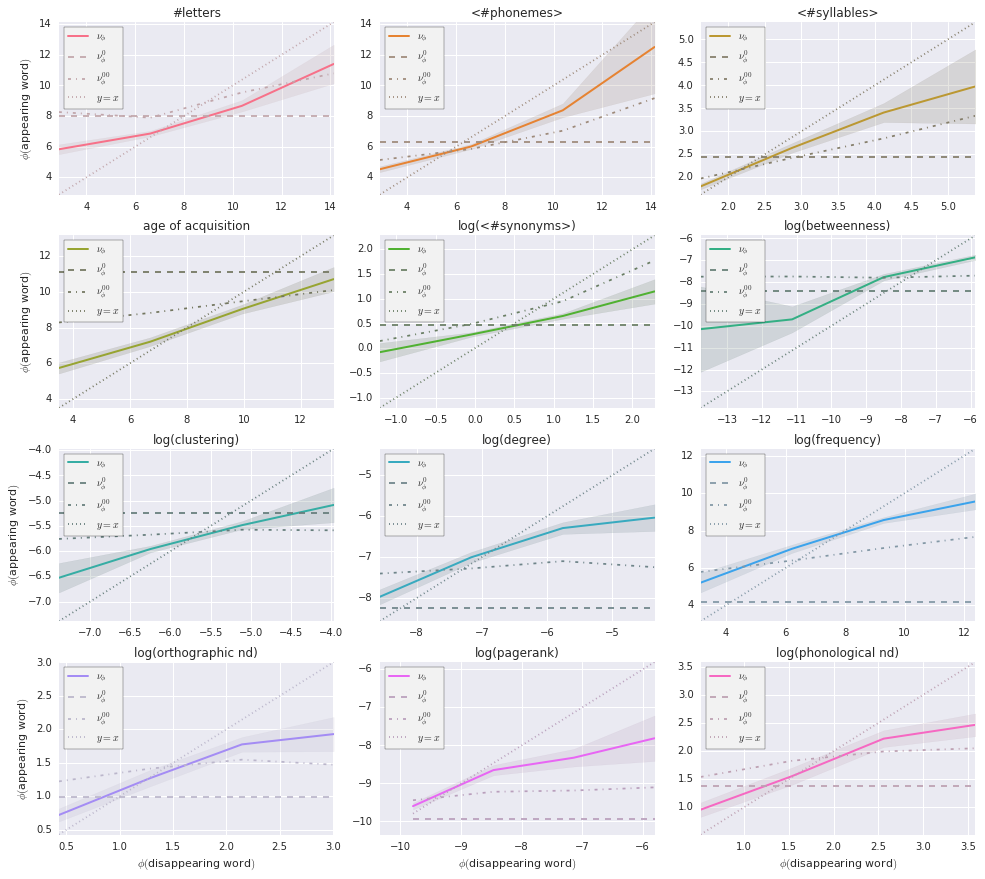

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

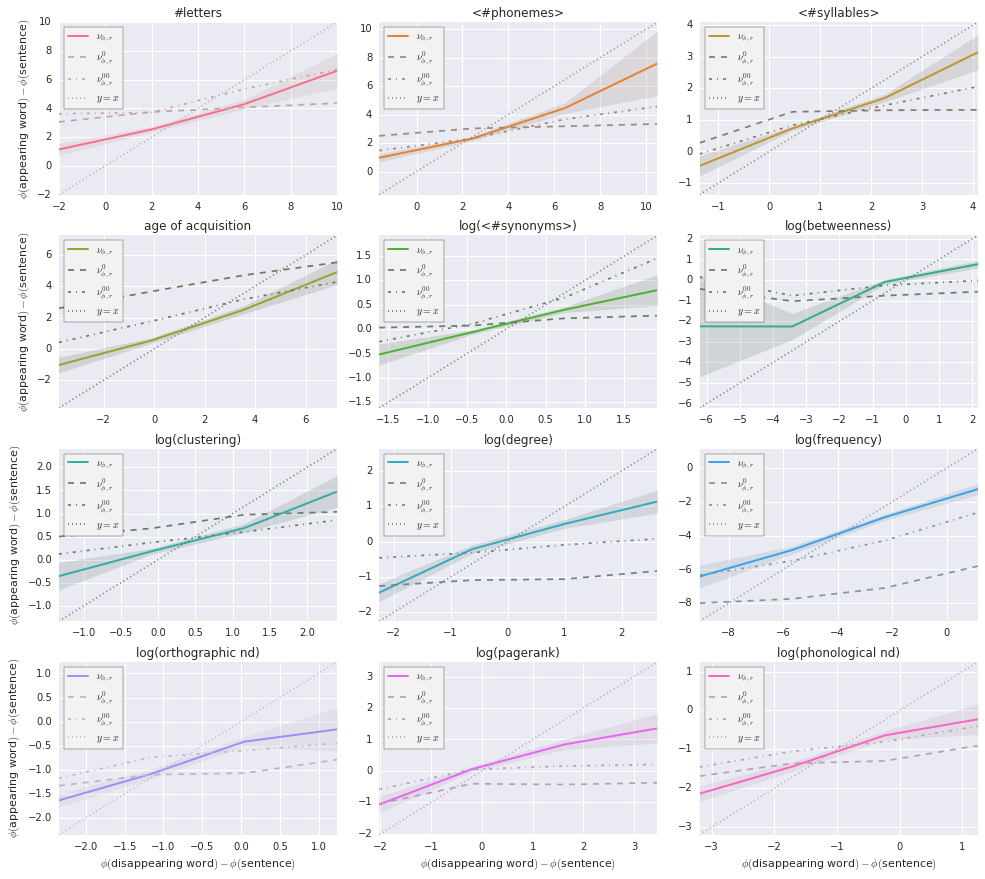

In [8]:
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

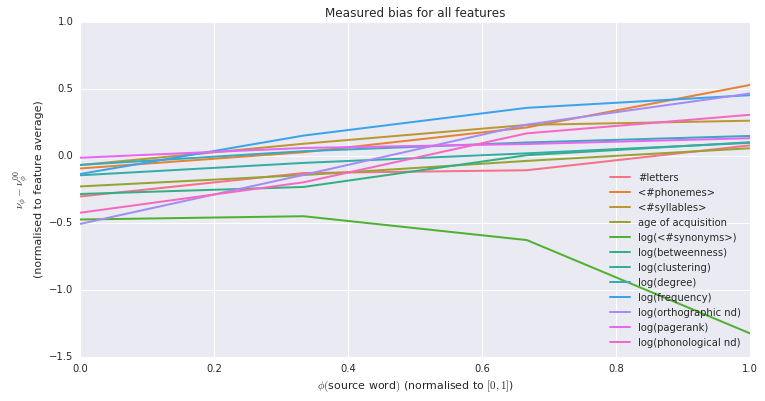

In [9]:
palette = sb.color_palette('husl', len(Substitution.__features__))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

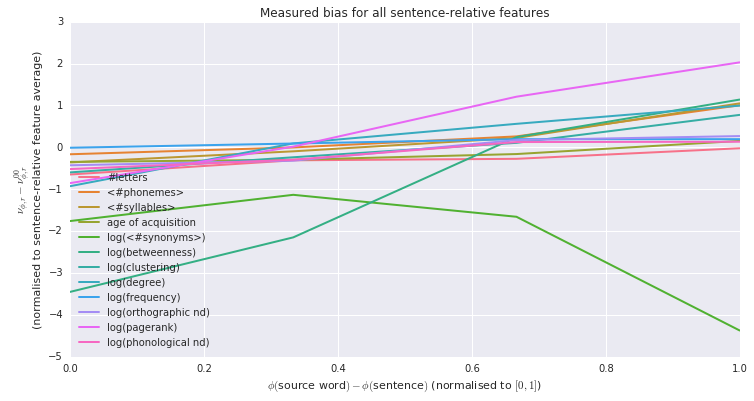

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False, relative=True)
ax.legend(loc='lower left')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

### 2.3 Feature variations, reduced to features we expose in the paper

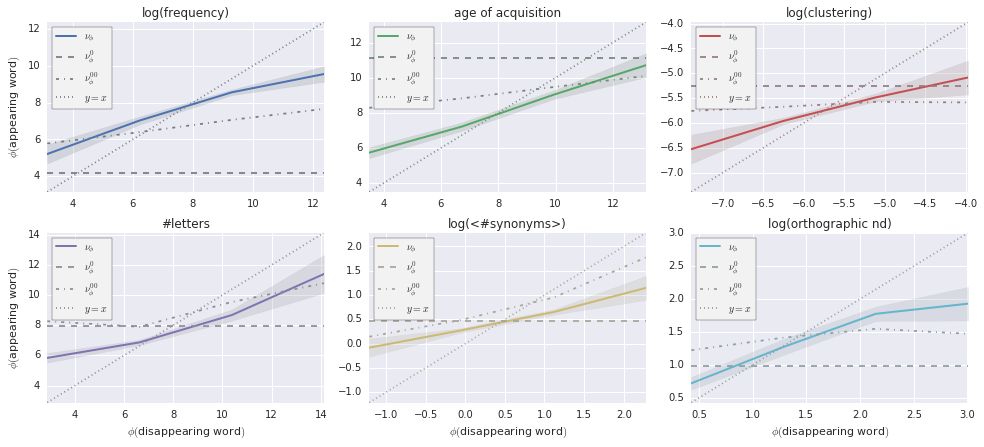

In [11]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

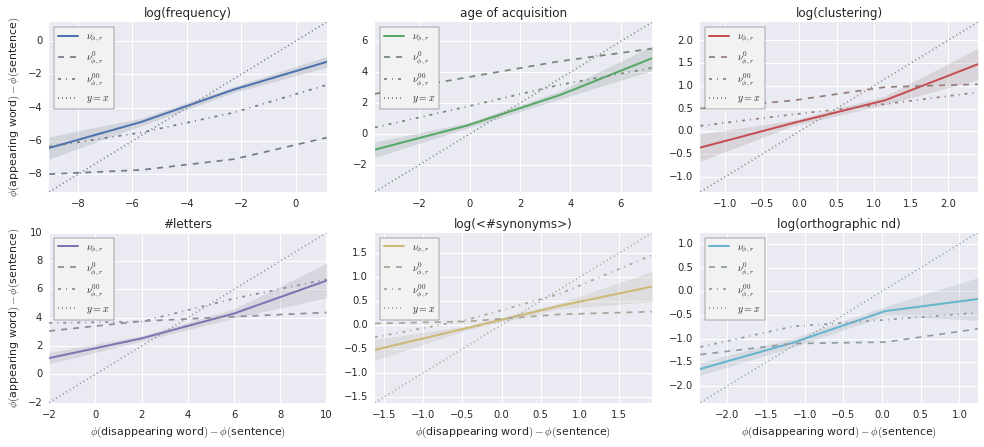

In [12]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Now $\nu_{\phi} - \nu_{\phi}^{00}$

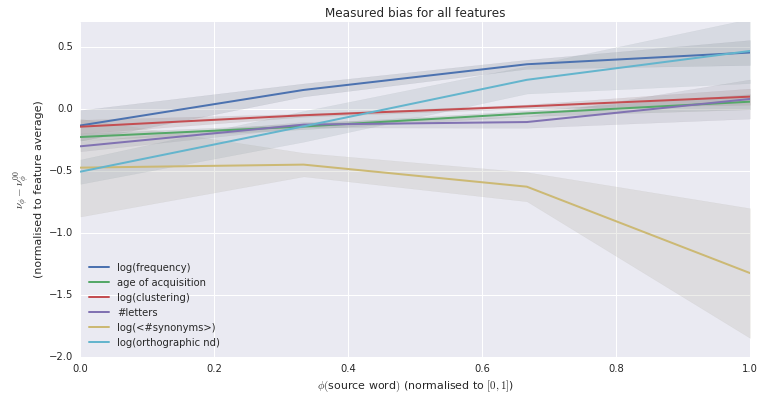

In [13]:
palette = sb.color_palette('deep', len(PAPER_FEATURES))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j])
ax.legend(loc='lower left')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

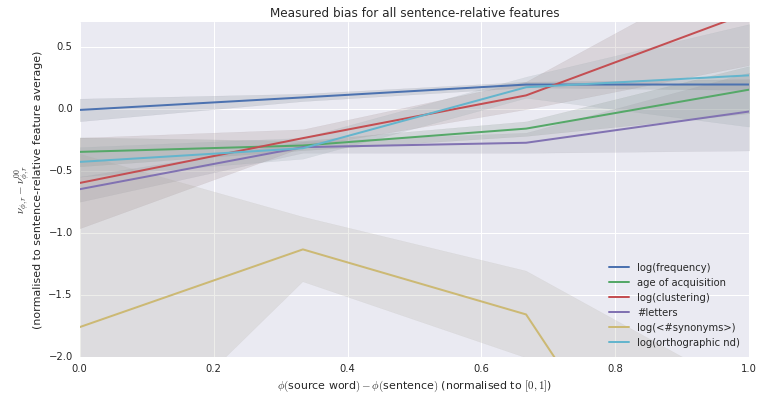

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], relative=True)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [15]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count, right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count, right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (dest[(x_bins == x) & (y_bins == y)] -
                              source[(x_bins == x) & (y_bins == y)]).mean()
            v_values[y, x] = (dest_rel[(x_bins == x) & (y_bins == y)] -
                              source_rel[(x_bins == x) & (y_bins == y)]).mean()
            strength[y, x] = np.sqrt((dest[(x_bins == x) & (y_bins == y)] - 
                                      source[(x_bins == x) & (y_bins == y)]) ** 2 +
                                     (dest_rel[(x_bins == x) & (y_bins == y)] - 
                                      source_rel[(x_bins == x) & (y_bins == y)]) ** 2).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


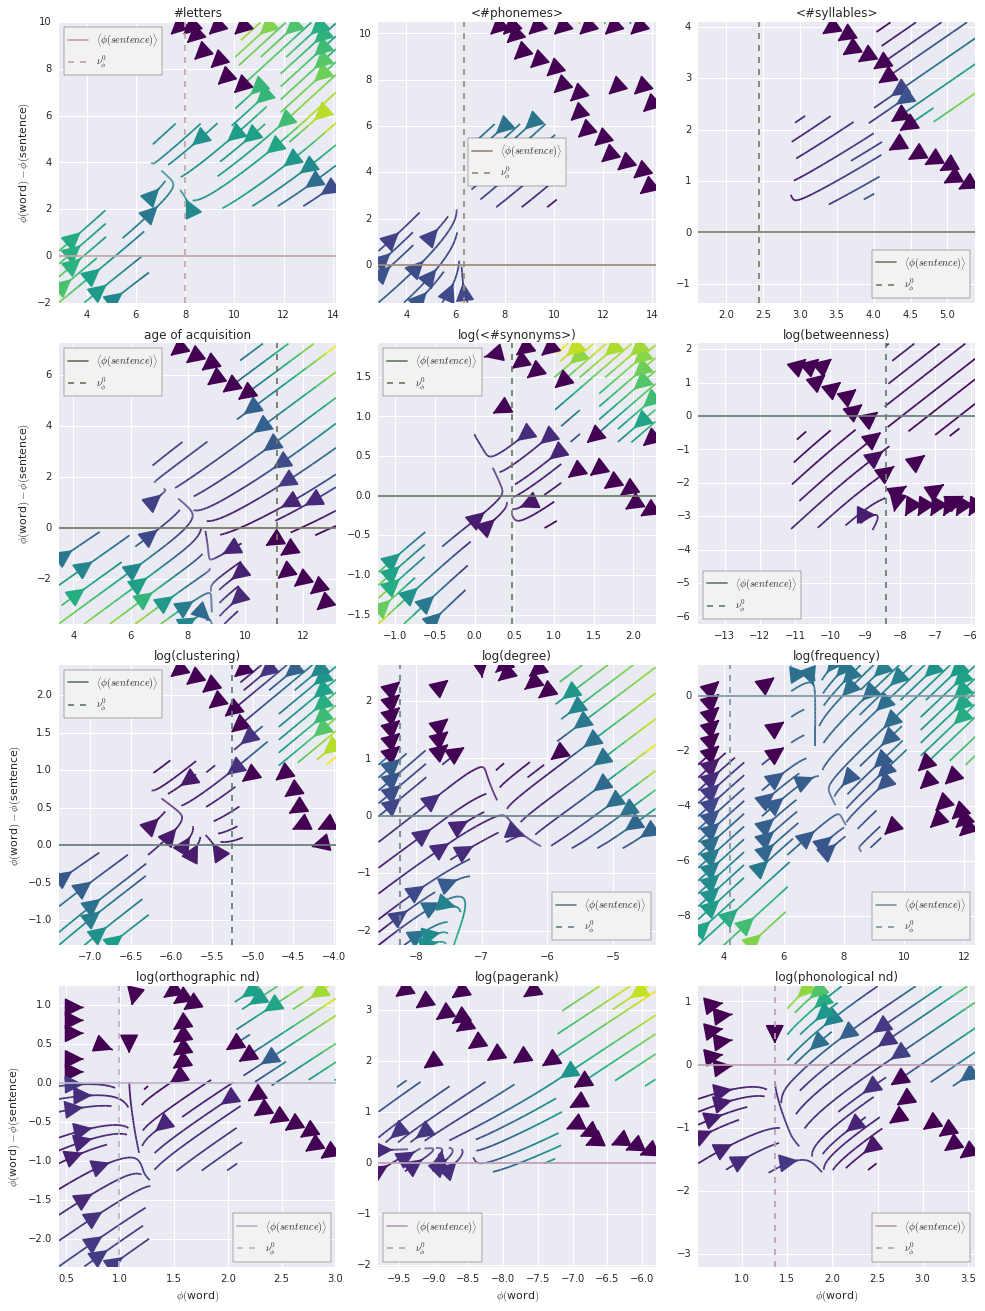

In [16]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


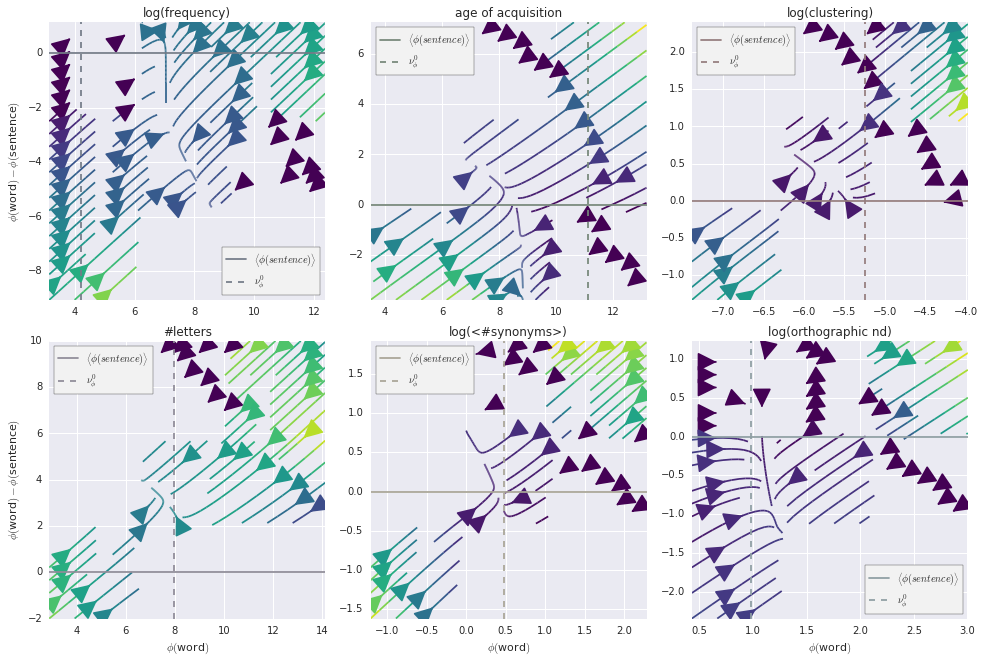

In [17]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account.

### 4.1 On all the features

Compute the actual PCA

In [18]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 11 components.

Those explain the following variance:
[ 0.50909548  0.18381294  0.08353985  0.07889229  0.03725897  0.02739371
  0.02447409  0.01897021  0.01432816  0.01030029  0.00683136]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,0.524808,-0.207146,0.064655,-0.207932,-0.210024,0.451102,-0.207881,-0.236212,0.419969,-0.284653,0.173881,-0.001432
Component-1,0.415688,-0.354972,0.132935,-0.311044,-0.229932,-0.429896,0.127902,-0.290568,-0.434502,0.178577,-0.161038,0.041171
Component-2,0.433051,0.604561,-0.097884,0.249848,-0.532527,-0.078105,0.015440,0.261277,-0.049055,0.094661,-0.045863,-0.057506


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [19]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 57703) |          | Elapsed Time: 0:00:41 ETA:  27 days, 20:53:18

  0% (  125 of 57703) |                    | Elapsed Time: 0:00:42 ETA:  0:07:04

  0% (  246 of 57703) |                    | Elapsed Time: 0:00:43 ETA:  0:07:09

  0% (  360 of 57703) |                    | Elapsed Time: 0:00:44 ETA:  0:07:19

  0% (  480 of 57703) |                    | Elapsed Time: 0:00:45 ETA:  0:07:18

  1% (  597 of 57703) |                    | Elapsed Time: 0:00:46 ETA:  0:07:19

  1% (  722 of 57703) |                    | Elapsed Time: 0:00:47 ETA:  0:07:18

  1% (  841 of 57703) |                    | Elapsed Time: 0:00:48 ETA:  0:07:17

  1% (  969 of 57703) |                    | Elapsed Time: 0:00:49 ETA:  0:07:11

  1% ( 1097 of 57703) |                    | Elapsed Time: 0:00:50 ETA:  0:07:08

  2% ( 1225 of 57703) |                    | Elapsed Time: 0:00:51 ETA:  0:07:04

  2% ( 1360 of 57703) |                    | Elapsed Time: 0:00:52 ETA:  0:06:53

  2% ( 1443 of 57703) |                    | Elapsed Time: 0:00:53 ETA:  0:06:43

  2% ( 1602 of 57703) |                    | Elapsed Time: 0:00:54 ETA:  0:06:23

  2% ( 1707 of 57703) |                    | Elapsed Time: 0:00:55 ETA:  0:06:29

  3% ( 1773 of 57703) |                    | Elapsed Time: 0:00:56 ETA:  0:06:55

  3% ( 1836 of 57703) |                    | Elapsed Time: 0:00:57 ETA:  0:07:20

  3% ( 1900 of 57703) |                    | Elapsed Time: 0:00:58 ETA:  0:07:54

  3% ( 1964 of 57703) |                    | Elapsed Time: 0:00:59 ETA:  0:08:32

  3% ( 2029 of 57703) |                    | Elapsed Time: 0:01:00 ETA:  0:09:15

  3% ( 2101 of 57703) |                    | Elapsed Time: 0:01:01 ETA:  0:10:07

  3% ( 2164 of 57703) |                    | Elapsed Time: 0:01:02 ETA:  0:10:28

  3% ( 2292 of 57703) |                    | Elapsed Time: 0:01:03 ETA:  0:10:58

  4% ( 2428 of 57703) |                    | Elapsed Time: 0:01:04 ETA:  0:10:26

  4% ( 2561 of 57703) |                    | Elapsed Time: 0:01:05 ETA:  0:09:26

  4% ( 2705 of 57703) |                    | Elapsed Time: 0:01:06 ETA:  0:08:27

  5% ( 2886 of 57703) |#                   | Elapsed Time: 0:01:07 ETA:  0:06:51

  5% ( 3058 of 57703) |#                   | Elapsed Time: 0:01:08 ETA:  0:06:01

  5% ( 3231 of 57703) |#                   | Elapsed Time: 0:01:09 ETA:  0:05:21

  5% ( 3405 of 57703) |#                   | Elapsed Time: 0:01:10 ETA:  0:05:04

  6% ( 3607 of 57703) |#                   | Elapsed Time: 0:01:11 ETA:  0:04:41

  6% ( 3781 of 57703) |#                   | Elapsed Time: 0:01:12 ETA:  0:04:28

  6% ( 3949 of 57703) |#                   | Elapsed Time: 0:01:13 ETA:  0:04:21

  7% ( 4085 of 57703) |#                   | Elapsed Time: 0:01:14 ETA:  0:04:31

  7% ( 4218 of 57703) |#                   | Elapsed Time: 0:01:15 ETA:  0:04:39

  7% ( 4328 of 57703) |#                   | Elapsed Time: 0:01:16 ETA:  0:04:47

  7% ( 4463 of 57703) |#                   | Elapsed Time: 0:01:17 ETA:  0:04:58

  7% ( 4597 of 57703) |#                   | Elapsed Time: 0:01:18 ETA:  0:05:09

  8% ( 4735 of 57703) |#                   | Elapsed Time: 0:01:19 ETA:  0:05:20

  8% ( 4871 of 57703) |#                   | Elapsed Time: 0:01:20 ETA:  0:05:24

  8% ( 4971 of 57703) |#                   | Elapsed Time: 0:01:21 ETA:  0:05:48

  8% ( 5050 of 57703) |#                   | Elapsed Time: 0:01:21 ETA:  0:06:12

  8% ( 5115 of 57703) |#                   | Elapsed Time: 0:01:22 ETA:  0:06:43

  8% ( 5189 of 57703) |#                   | Elapsed Time: 0:01:23 ETA:  0:07:11

  9% ( 5336 of 57703) |#                   | Elapsed Time: 0:01:24 ETA:  0:07:01

  9% ( 5465 of 57703) |#                   | Elapsed Time: 0:01:25 ETA:  0:07:04

  9% ( 5594 of 57703) |#                   | Elapsed Time: 0:01:26 ETA:  0:07:06

  9% ( 5715 of 57703) |#                   | Elapsed Time: 0:01:27 ETA:  0:07:14

 10% ( 5771 of 57703) |##                  | Elapsed Time: 0:01:28 ETA:  0:07:53

 10% ( 5838 of 57703) |##                  | Elapsed Time: 0:01:29 ETA:  0:08:14

 10% ( 5904 of 57703) |##                  | Elapsed Time: 0:01:30 ETA:  0:08:35

 10% ( 5969 of 57703) |##                  | Elapsed Time: 0:01:31 ETA:  0:08:34

 10% ( 6041 of 57703) |##                  | Elapsed Time: 0:01:32 ETA:  0:08:35

 10% ( 6172 of 57703) |##                  | Elapsed Time: 0:01:33 ETA:  0:08:45

 10% ( 6283 of 57703) |##                  | Elapsed Time: 0:01:34 ETA:  0:08:58

 11% ( 6378 of 57703) |##                  | Elapsed Time: 0:01:35 ETA:  0:09:24

 11% ( 6492 of 57703) |##                  | Elapsed Time: 0:01:36 ETA:  0:09:23

 11% ( 6639 of 57703) |##                  | Elapsed Time: 0:01:37 ETA:  0:08:19

 11% ( 6786 of 57703) |##                  | Elapsed Time: 0:01:38 ETA:  0:07:27

 12% ( 6938 of 57703) |##                  | Elapsed Time: 0:01:39 ETA:  0:06:40

 12% ( 7042 of 57703) |##                  | Elapsed Time: 0:01:40 ETA:  0:06:20

 12% ( 7142 of 57703) |##                  | Elapsed Time: 0:01:41 ETA:  0:06:07

 12% ( 7213 of 57703) |##                  | Elapsed Time: 0:01:42 ETA:  0:06:16

 12% ( 7315 of 57703) |##                  | Elapsed Time: 0:01:43 ETA:  0:06:19

 12% ( 7421 of 57703) |##                  | Elapsed Time: 0:01:44 ETA:  0:06:12

 13% ( 7522 of 57703) |##                  | Elapsed Time: 0:01:45 ETA:  0:06:22

 13% ( 7625 of 57703) |##                  | Elapsed Time: 0:01:46 ETA:  0:06:43

 13% ( 7738 of 57703) |##                  | Elapsed Time: 0:01:47 ETA:  0:07:00

 13% ( 7847 of 57703) |##                  | Elapsed Time: 0:01:48 ETA:  0:07:24

 13% ( 7935 of 57703) |##                  | Elapsed Time: 0:01:49 ETA:  0:07:20

 13% ( 8043 of 57703) |##                  | Elapsed Time: 0:01:50 ETA:  0:07:15

 14% ( 8151 of 57703) |##                  | Elapsed Time: 0:01:51 ETA:  0:07:12

 14% ( 8259 of 57703) |##                  | Elapsed Time: 0:01:52 ETA:  0:07:07

 14% ( 8366 of 57703) |##                  | Elapsed Time: 0:01:53 ETA:  0:07:06

 14% ( 8477 of 57703) |##                  | Elapsed Time: 0:01:54 ETA:  0:06:59

 14% ( 8585 of 57703) |##                  | Elapsed Time: 0:01:55 ETA:  0:06:55

 15% ( 8656 of 57703) |###                 | Elapsed Time: 0:01:56 ETA:  0:06:57

 15% ( 8763 of 57703) |###                 | Elapsed Time: 0:01:57 ETA:  0:06:57

 15% ( 8871 of 57703) |###                 | Elapsed Time: 0:01:58 ETA:  0:06:58

 15% ( 8979 of 57703) |###                 | Elapsed Time: 0:01:59 ETA:  0:06:57

 15% ( 9090 of 57703) |###                 | Elapsed Time: 0:02:00 ETA:  0:06:54

 15% ( 9202 of 57703) |###                 | Elapsed Time: 0:02:01 ETA:  0:06:51

 16% ( 9337 of 57703) |###                 | Elapsed Time: 0:02:02 ETA:  0:06:34

 16% ( 9377 of 57703) |###                 | Elapsed Time: 0:02:02 ETA:  0:06:30

 16% ( 9505 of 57703) |###                 | Elapsed Time: 0:02:03 ETA:  0:06:18

 16% ( 9631 of 57703) |###                 | Elapsed Time: 0:02:04 ETA:  0:06:09

 16% ( 9754 of 57703) |###                 | Elapsed Time: 0:02:05 ETA:  0:06:00

 17% ( 9875 of 57703) |###                 | Elapsed Time: 0:02:06 ETA:  0:05:52

 17% ( 9998 of 57703) |###                 | Elapsed Time: 0:02:07 ETA:  0:05:44

 17% (10099 of 57703) |###                 | Elapsed Time: 0:02:08 ETA:  0:05:36

 17% (10215 of 57703) |###                 | Elapsed Time: 0:02:09 ETA:  0:05:34

 17% (10315 of 57703) |###                 | Elapsed Time: 0:02:10 ETA:  0:05:49

 18% (10427 of 57703) |###                 | Elapsed Time: 0:02:11 ETA:  0:05:54

 18% (10528 of 57703) |###                 | Elapsed Time: 0:02:12 ETA:  0:06:06

 18% (10636 of 57703) |###                 | Elapsed Time: 0:02:13 ETA:  0:06:13

 18% (10750 of 57703) |###                 | Elapsed Time: 0:02:14 ETA:  0:06:17

 18% (10820 of 57703) |###                 | Elapsed Time: 0:02:14 ETA:  0:06:23

 18% (10923 of 57703) |###                 | Elapsed Time: 0:02:15 ETA:  0:06:34

 19% (11040 of 57703) |###                 | Elapsed Time: 0:02:16 ETA:  0:06:36

 19% (11162 of 57703) |###                 | Elapsed Time: 0:02:17 ETA:  0:06:32

 19% (11271 of 57703) |###                 | Elapsed Time: 0:02:18 ETA:  0:06:26

 19% (11379 of 57703) |###                 | Elapsed Time: 0:02:19 ETA:  0:06:27

 19% (11502 of 57703) |###                 | Elapsed Time: 0:02:20 ETA:  0:06:14

 20% (11541 of 57703) |####                | Elapsed Time: 0:02:21 ETA:  0:06:10

 20% (11660 of 57703) |####                | Elapsed Time: 0:02:22 ETA:  0:06:06

 20% (11777 of 57703) |####                | Elapsed Time: 0:02:23 ETA:  0:06:00

 20% (11894 of 57703) |####                | Elapsed Time: 0:02:24 ETA:  0:05:52

 20% (12020 of 57703) |####                | Elapsed Time: 0:02:25 ETA:  0:05:46

 21% (12133 of 57703) |####                | Elapsed Time: 0:02:26 ETA:  0:05:50

 21% (12262 of 57703) |####                | Elapsed Time: 0:02:27 ETA:  0:05:34

 21% (12388 of 57703) |####                | Elapsed Time: 0:02:28 ETA:  0:05:31

 21% (12506 of 57703) |####                | Elapsed Time: 0:02:29 ETA:  0:05:32

 21% (12625 of 57703) |####                | Elapsed Time: 0:02:30 ETA:  0:05:30

 22% (12739 of 57703) |####                | Elapsed Time: 0:02:31 ETA:  0:05:31

 22% (12847 of 57703) |####                | Elapsed Time: 0:02:32 ETA:  0:05:35

 22% (12984 of 57703) |####                | Elapsed Time: 0:02:33 ETA:  0:05:35

 22% (13135 of 57703) |####                | Elapsed Time: 0:02:34 ETA:  0:05:20

 23% (13277 of 57703) |####                | Elapsed Time: 0:02:35 ETA:  0:05:10

 23% (13417 of 57703) |####                | Elapsed Time: 0:02:36 ETA:  0:05:02

 23% (13566 of 57703) |####                | Elapsed Time: 0:02:37 ETA:  0:04:48

 23% (13705 of 57703) |####                | Elapsed Time: 0:02:38 ETA:  0:04:32

 24% (13862 of 57703) |####                | Elapsed Time: 0:02:39 ETA:  0:04:14

 24% (13955 of 57703) |####                | Elapsed Time: 0:02:40 ETA:  0:04:19

 24% (14046 of 57703) |####                | Elapsed Time: 0:02:41 ETA:  0:04:26

 24% (14137 of 57703) |####                | Elapsed Time: 0:02:42 ETA:  0:04:43

 24% (14255 of 57703) |####                | Elapsed Time: 0:02:43 ETA:  0:04:55

 24% (14391 of 57703) |####                | Elapsed Time: 0:02:44 ETA:  0:04:56

 25% (14426 of 57703) |#####               | Elapsed Time: 0:02:44 ETA:  0:05:01

 25% (14568 of 57703) |#####               | Elapsed Time: 0:02:45 ETA:  0:05:03

 25% (14718 of 57703) |#####               | Elapsed Time: 0:02:46 ETA:  0:05:04

 25% (14860 of 57703) |#####               | Elapsed Time: 0:02:47 ETA:  0:05:10

 25% (15000 of 57703) |#####               | Elapsed Time: 0:02:48 ETA:  0:04:48

 26% (15148 of 57703) |#####               | Elapsed Time: 0:02:49 ETA:  0:04:14

 26% (15277 of 57703) |#####               | Elapsed Time: 0:02:50 ETA:  0:04:09

 26% (15386 of 57703) |#####               | Elapsed Time: 0:02:51 ETA:  0:04:19

 26% (15492 of 57703) |#####               | Elapsed Time: 0:02:52 ETA:  0:04:30

 27% (15597 of 57703) |#####               | Elapsed Time: 0:02:53 ETA:  0:04:46

 27% (15734 of 57703) |#####               | Elapsed Time: 0:02:54 ETA:  0:04:51

 27% (15869 of 57703) |#####               | Elapsed Time: 0:02:55 ETA:  0:04:45

 27% (15985 of 57703) |#####               | Elapsed Time: 0:02:56 ETA:  0:04:55

 27% (16106 of 57703) |#####               | Elapsed Time: 0:02:57 ETA:  0:04:57

 28% (16229 of 57703) |#####               | Elapsed Time: 0:02:58 ETA:  0:04:56

 28% (16403 of 57703) |#####               | Elapsed Time: 0:02:59 ETA:  0:04:36

 28% (16532 of 57703) |#####               | Elapsed Time: 0:03:00 ETA:  0:04:27

 28% (16590 of 57703) |#####               | Elapsed Time: 0:03:01 ETA:  0:04:17

 28% (16717 of 57703) |#####               | Elapsed Time: 0:03:02 ETA:  0:04:08

 29% (16847 of 57703) |#####               | Elapsed Time: 0:03:03 ETA:  0:04:09

 29% (17014 of 57703) |#####               | Elapsed Time: 0:03:04 ETA:  0:04:03

 29% (17183 of 57703) |#####               | Elapsed Time: 0:03:05 ETA:  0:03:43

 30% (17311 of 57703) |######              | Elapsed Time: 0:03:05 ETA:  0:03:28

 30% (17480 of 57703) |######              | Elapsed Time: 0:03:06 ETA:  0:03:13

 30% (17649 of 57703) |######              | Elapsed Time: 0:03:07 ETA:  0:03:13

 30% (17815 of 57703) |######              | Elapsed Time: 0:03:08 ETA:  0:03:01

 31% (17980 of 57703) |######              | Elapsed Time: 0:03:09 ETA:  0:02:54

 31% (18033 of 57703) |######              | Elapsed Time: 0:03:10 ETA:  0:02:45

 31% (18199 of 57703) |######              | Elapsed Time: 0:03:11 ETA:  0:02:34

 31% (18337 of 57703) |######              | Elapsed Time: 0:03:12 ETA:  0:02:41

 32% (18498 of 57703) |######              | Elapsed Time: 0:03:13 ETA:  0:02:42

 32% (18619 of 57703) |######              | Elapsed Time: 0:03:14 ETA:  0:02:54

 32% (18754 of 57703) |######              | Elapsed Time: 0:03:15 ETA:  0:03:15

 32% (18911 of 57703) |######              | Elapsed Time: 0:03:16 ETA:  0:03:17

 33% (19052 of 57703) |######              | Elapsed Time: 0:03:17 ETA:  0:03:25

 33% (19194 of 57703) |######              | Elapsed Time: 0:03:18 ETA:  0:03:27

 33% (19364 of 57703) |######              | Elapsed Time: 0:03:19 ETA:  0:03:24

 33% (19475 of 57703) |######              | Elapsed Time: 0:03:20 ETA:  0:03:15

 34% (19649 of 57703) |######              | Elapsed Time: 0:03:21 ETA:  0:03:10

 34% (19814 of 57703) |######              | Elapsed Time: 0:03:22 ETA:  0:02:54

 34% (19982 of 57703) |######              | Elapsed Time: 0:03:23 ETA:  0:02:38

 34% (20130 of 57703) |######              | Elapsed Time: 0:03:24 ETA:  0:02:39

 35% (20197 of 57703) |#######             | Elapsed Time: 0:03:24 ETA:  0:02:48

 35% (20286 of 57703) |#######             | Elapsed Time: 0:03:25 ETA:  0:03:02

 35% (20392 of 57703) |#######             | Elapsed Time: 0:03:26 ETA:  0:03:13

 35% (20488 of 57703) |#######             | Elapsed Time: 0:03:27 ETA:  0:03:39

 35% (20587 of 57703) |#######             | Elapsed Time: 0:03:28 ETA:  0:04:01

 35% (20719 of 57703) |#######             | Elapsed Time: 0:03:29 ETA:  0:04:18

 36% (20841 of 57703) |#######             | Elapsed Time: 0:03:30 ETA:  0:04:36

 36% (20918 of 57703) |#######             | Elapsed Time: 0:03:31 ETA:  0:04:59

 36% (21047 of 57703) |#######             | Elapsed Time: 0:03:32 ETA:  0:05:09

 36% (21199 of 57703) |#######             | Elapsed Time: 0:03:33 ETA:  0:04:45

 36% (21347 of 57703) |#######             | Elapsed Time: 0:03:34 ETA:  0:04:16

 37% (21451 of 57703) |#######             | Elapsed Time: 0:03:35 ETA:  0:04:16

 37% (21582 of 57703) |#######             | Elapsed Time: 0:03:36 ETA:  0:04:00

 37% (21639 of 57703) |#######             | Elapsed Time: 0:03:36 ETA:  0:03:42

 37% (21782 of 57703) |#######             | Elapsed Time: 0:03:37 ETA:  0:03:37

 37% (21860 of 57703) |#######             | Elapsed Time: 0:03:38 ETA:  0:03:54

 38% (21937 of 57703) |#######             | Elapsed Time: 0:03:39 ETA:  0:04:15

 38% (22098 of 57703) |#######             | Elapsed Time: 0:03:40 ETA:  0:03:59

 38% (22225 of 57703) |#######             | Elapsed Time: 0:03:41 ETA:  0:04:10

 38% (22325 of 57703) |#######             | Elapsed Time: 0:03:42 ETA:  0:04:31

 38% (22360 of 57703) |#######             | Elapsed Time: 0:03:43 ETA:  0:04:19

 38% (22472 of 57703) |#######             | Elapsed Time: 0:03:44 ETA:  0:04:28

 39% (22611 of 57703) |#######             | Elapsed Time: 0:03:45 ETA:  0:04:24

 39% (22749 of 57703) |#######             | Elapsed Time: 0:03:46 ETA:  0:04:25

 39% (22906 of 57703) |#######             | Elapsed Time: 0:03:47 ETA:  0:03:47

 39% (23033 of 57703) |#######             | Elapsed Time: 0:03:48 ETA:  0:03:26

 40% (23082 of 57703) |########            | Elapsed Time: 0:03:48 ETA:  0:03:41

 40% (23194 of 57703) |########            | Elapsed Time: 0:03:49 ETA:  0:03:47

 40% (23304 of 57703) |########            | Elapsed Time: 0:03:50 ETA:  0:03:41

 40% (23440 of 57703) |########            | Elapsed Time: 0:03:51 ETA:  0:03:40

 40% (23565 of 57703) |########            | Elapsed Time: 0:03:52 ETA:  0:03:34

 41% (23703 of 57703) |########            | Elapsed Time: 0:03:53 ETA:  0:03:33

 41% (23803 of 57703) |########            | Elapsed Time: 0:03:54 ETA:  0:03:32

 41% (23934 of 57703) |########            | Elapsed Time: 0:03:55 ETA:  0:03:42

 41% (24093 of 57703) |########            | Elapsed Time: 0:03:56 ETA:  0:03:27

 41% (24230 of 57703) |########            | Elapsed Time: 0:03:57 ETA:  0:03:21

 42% (24332 of 57703) |########            | Elapsed Time: 0:03:58 ETA:  0:03:24

 42% (24449 of 57703) |########            | Elapsed Time: 0:03:59 ETA:  0:03:20

 42% (24524 of 57703) |########            | Elapsed Time: 0:03:59 ETA:  0:03:16

 42% (24682 of 57703) |########            | Elapsed Time: 0:04:00 ETA:  0:03:03

 43% (24823 of 57703) |########            | Elapsed Time: 0:04:01 ETA:  0:03:01

 43% (24962 of 57703) |########            | Elapsed Time: 0:04:02 ETA:  0:03:00

 43% (25102 of 57703) |########            | Elapsed Time: 0:04:03 ETA:  0:02:56

 43% (25246 of 57703) |########            | Elapsed Time: 0:04:04 ETA:  0:03:02

 43% (25388 of 57703) |########            | Elapsed Time: 0:04:05 ETA:  0:02:44

 44% (25508 of 57703) |########            | Elapsed Time: 0:04:06 ETA:  0:02:42

 44% (25646 of 57703) |########            | Elapsed Time: 0:04:07 ETA:  0:02:46

 44% (25791 of 57703) |########            | Elapsed Time: 0:04:08 ETA:  0:02:49

 44% (25935 of 57703) |########            | Elapsed Time: 0:04:09 ETA:  0:02:47

 45% (25967 of 57703) |#########           | Elapsed Time: 0:04:10 ETA:  0:02:48

 45% (26092 of 57703) |#########           | Elapsed Time: 0:04:11 ETA:  0:02:54

 45% (26223 of 57703) |#########           | Elapsed Time: 0:04:12 ETA:  0:02:58

 45% (26368 of 57703) |#########           | Elapsed Time: 0:04:13 ETA:  0:02:53

 45% (26510 of 57703) |#########           | Elapsed Time: 0:04:14 ETA:  0:02:52

 46% (26651 of 57703) |#########           | Elapsed Time: 0:04:15 ETA:  0:02:43

 46% (26688 of 57703) |#########           | Elapsed Time: 0:04:15 ETA:  0:02:42

 46% (26826 of 57703) |#########           | Elapsed Time: 0:04:16 ETA:  0:02:44

 46% (26944 of 57703) |#########           | Elapsed Time: 0:04:17 ETA:  0:02:54

 46% (27066 of 57703) |#########           | Elapsed Time: 0:04:18 ETA:  0:02:57

 47% (27226 of 57703) |#########           | Elapsed Time: 0:04:19 ETA:  0:02:43

 47% (27324 of 57703) |#########           | Elapsed Time: 0:04:20 ETA:  0:02:55

 47% (27409 of 57703) |#########           | Elapsed Time: 0:04:21 ETA:  0:03:11

 47% (27518 of 57703) |#########           | Elapsed Time: 0:04:22 ETA:  0:03:25

 47% (27668 of 57703) |#########           | Elapsed Time: 0:04:23 ETA:  0:03:20

 48% (27750 of 57703) |#########           | Elapsed Time: 0:04:24 ETA:  0:03:39

 48% (27859 of 57703) |#########           | Elapsed Time: 0:04:25 ETA:  0:03:51

 48% (27980 of 57703) |#########           | Elapsed Time: 0:04:26 ETA:  0:03:49

 48% (28105 of 57703) |#########           | Elapsed Time: 0:04:27 ETA:  0:03:46

 48% (28131 of 57703) |#########           | Elapsed Time: 0:04:27 ETA:  0:04:09

 48% (28256 of 57703) |#########           | Elapsed Time: 0:04:28 ETA:  0:03:53

 49% (28398 of 57703) |#########           | Elapsed Time: 0:04:29 ETA:  0:03:31

 49% (28496 of 57703) |#########           | Elapsed Time: 0:04:30 ETA:  0:03:36

 49% (28594 of 57703) |#########           | Elapsed Time: 0:04:31 ETA:  0:04:02

 49% (28689 of 57703) |#########           | Elapsed Time: 0:04:32 ETA:  0:03:54

 49% (28814 of 57703) |#########           | Elapsed Time: 0:04:33 ETA:  0:03:45

 50% (28852 of 57703) |##########          | Elapsed Time: 0:04:33 ETA:  0:03:46

 50% (28983 of 57703) |##########          | Elapsed Time: 0:04:34 ETA:  0:03:42

 50% (29110 of 57703) |##########          | Elapsed Time: 0:04:35 ETA:  0:03:35

 50% (29225 of 57703) |##########          | Elapsed Time: 0:04:36 ETA:  0:03:40

 50% (29353 of 57703) |##########          | Elapsed Time: 0:04:37 ETA:  0:03:46

 51% (29483 of 57703) |##########          | Elapsed Time: 0:04:38 ETA:  0:03:28

 51% (29573 of 57703) |##########          | Elapsed Time: 0:04:39 ETA:  0:03:11

 51% (29713 of 57703) |##########          | Elapsed Time: 0:04:40 ETA:  0:02:49

 51% (29826 of 57703) |##########          | Elapsed Time: 0:04:41 ETA:  0:02:53

 51% (29946 of 57703) |##########          | Elapsed Time: 0:04:42 ETA:  0:02:55

 52% (30048 of 57703) |##########          | Elapsed Time: 0:04:43 ETA:  0:03:07

 52% (30213 of 57703) |##########          | Elapsed Time: 0:04:44 ETA:  0:02:50

 52% (30295 of 57703) |##########          | Elapsed Time: 0:04:45 ETA:  0:02:45

 52% (30416 of 57703) |##########          | Elapsed Time: 0:04:46 ETA:  0:02:47

 52% (30537 of 57703) |##########          | Elapsed Time: 0:04:47 ETA:  0:02:50

 53% (30658 of 57703) |##########          | Elapsed Time: 0:04:48 ETA:  0:02:54

 53% (30789 of 57703) |##########          | Elapsed Time: 0:04:49 ETA:  0:02:57

 53% (30929 of 57703) |##########          | Elapsed Time: 0:04:50 ETA:  0:02:45

 53% (31016 of 57703) |##########          | Elapsed Time: 0:04:50 ETA:  0:02:38

 54% (31168 of 57703) |##########          | Elapsed Time: 0:04:51 ETA:  0:02:17

 54% (31311 of 57703) |##########          | Elapsed Time: 0:04:52 ETA:  0:02:24

 54% (31435 of 57703) |##########          | Elapsed Time: 0:04:53 ETA:  0:02:24

 54% (31546 of 57703) |##########          | Elapsed Time: 0:04:54 ETA:  0:02:27

 54% (31632 of 57703) |##########          | Elapsed Time: 0:04:55 ETA:  0:02:41

 55% (31737 of 57703) |###########         | Elapsed Time: 0:04:56 ETA:  0:02:38

 55% (31886 of 57703) |###########         | Elapsed Time: 0:04:57 ETA:  0:02:30

 55% (32033 of 57703) |###########         | Elapsed Time: 0:04:58 ETA:  0:02:26

 55% (32198 of 57703) |###########         | Elapsed Time: 0:04:59 ETA:  0:02:13

 56% (32363 of 57703) |###########         | Elapsed Time: 0:05:00 ETA:  0:02:07

 56% (32458 of 57703) |###########         | Elapsed Time: 0:05:01 ETA:  0:02:07

 56% (32573 of 57703) |###########         | Elapsed Time: 0:05:02 ETA:  0:02:09

 56% (32638 of 57703) |###########         | Elapsed Time: 0:05:03 ETA:  0:02:27

 56% (32740 of 57703) |###########         | Elapsed Time: 0:05:04 ETA:  0:02:19

 56% (32853 of 57703) |###########         | Elapsed Time: 0:05:05 ETA:  0:02:24

 57% (32976 of 57703) |###########         | Elapsed Time: 0:05:06 ETA:  0:02:33

 57% (33106 of 57703) |###########         | Elapsed Time: 0:05:07 ETA:  0:02:40

 57% (33180 of 57703) |###########         | Elapsed Time: 0:05:07 ETA:  0:03:01

 57% (33304 of 57703) |###########         | Elapsed Time: 0:05:08 ETA:  0:03:21

 57% (33463 of 57703) |###########         | Elapsed Time: 0:05:09 ETA:  0:03:08

 58% (33607 of 57703) |###########         | Elapsed Time: 0:05:10 ETA:  0:02:52

 58% (33745 of 57703) |###########         | Elapsed Time: 0:05:11 ETA:  0:02:19

 58% (33901 of 57703) |###########         | Elapsed Time: 0:05:13 ETA:  0:01:50

 58% (34041 of 57703) |###########         | Elapsed Time: 0:05:14 ETA:  0:01:42

 59% (34178 of 57703) |###########         | Elapsed Time: 0:05:15 ETA:  0:01:39

 59% (34324 of 57703) |###########         | Elapsed Time: 0:05:16 ETA:  0:01:30

 59% (34442 of 57703) |###########         | Elapsed Time: 0:05:17 ETA:  0:01:32

 59% (34587 of 57703) |###########         | Elapsed Time: 0:05:18 ETA:  0:01:36

 60% (34622 of 57703) |############        | Elapsed Time: 0:05:18 ETA:  0:01:37

 60% (34741 of 57703) |############        | Elapsed Time: 0:05:19 ETA:  0:01:44

 60% (34879 of 57703) |############        | Elapsed Time: 0:05:20 ETA:  0:01:49

 60% (35031 of 57703) |############        | Elapsed Time: 0:05:21 ETA:  0:01:41

 60% (35163 of 57703) |############        | Elapsed Time: 0:05:22 ETA:  0:01:43

 61% (35344 of 57703) |############        | Elapsed Time: 0:05:23 ETA:  0:01:38

 61% (35492 of 57703) |############        | Elapsed Time: 0:05:24 ETA:  0:01:25

 61% (35622 of 57703) |############        | Elapsed Time: 0:05:25 ETA:  0:01:29

 62% (35787 of 57703) |############        | Elapsed Time: 0:05:26 ETA:  0:01:19

 62% (35908 of 57703) |############        | Elapsed Time: 0:05:27 ETA:  0:01:18

 62% (36065 of 57703) |############        | Elapsed Time: 0:05:28 ETA:  0:01:23

 62% (36191 of 57703) |############        | Elapsed Time: 0:05:29 ETA:  0:01:24

 62% (36283 of 57703) |############        | Elapsed Time: 0:05:30 ETA:  0:01:48

 63% (36368 of 57703) |############        | Elapsed Time: 0:05:31 ETA:  0:02:10

 63% (36502 of 57703) |############        | Elapsed Time: 0:05:32 ETA:  0:02:15

 63% (36672 of 57703) |############        | Elapsed Time: 0:05:33 ETA:  0:01:57

 63% (36786 of 57703) |############        | Elapsed Time: 0:05:34 ETA:  0:02:04

 63% (36896 of 57703) |############        | Elapsed Time: 0:05:35 ETA:  0:02:08

 64% (37039 of 57703) |############        | Elapsed Time: 0:05:36 ETA:  0:02:03

 64% (37185 of 57703) |############        | Elapsed Time: 0:05:37 ETA:  0:01:54

 64% (37321 of 57703) |############        | Elapsed Time: 0:05:38 ETA:  0:01:49

 64% (37472 of 57703) |############        | Elapsed Time: 0:05:39 ETA:  0:01:25

 65% (37507 of 57703) |#############       | Elapsed Time: 0:05:39 ETA:  0:01:05

 65% (37657 of 57703) |#############       | Elapsed Time: 0:05:40 ETA:  0:00:58

 65% (37804 of 57703) |#############       | Elapsed Time: 0:05:41 ETA:  0:01:05

 65% (37927 of 57703) |#############       | Elapsed Time: 0:05:42 ETA:  0:01:14

 65% (38080 of 57703) |#############       | Elapsed Time: 0:05:43 ETA:  0:00:58

 66% (38229 of 57703) |#############       | Elapsed Time: 0:05:44 ETA:  0:01:00

 66% (38380 of 57703) |#############       | Elapsed Time: 0:05:45 ETA:  0:00:53

 66% (38529 of 57703) |#############       | Elapsed Time: 0:05:46 ETA:  0:00:53

 66% (38640 of 57703) |#############       | Elapsed Time: 0:05:47 ETA:  0:01:04

 67% (38745 of 57703) |#############       | Elapsed Time: 0:05:48 ETA:  0:01:21

 67% (38841 of 57703) |#############       | Elapsed Time: 0:05:49 ETA:  0:01:41

 67% (38950 of 57703) |#############       | Elapsed Time: 0:05:50 ETA:  0:01:38

 67% (39080 of 57703) |#############       | Elapsed Time: 0:05:51 ETA:  0:01:47

 67% (39205 of 57703) |#############       | Elapsed Time: 0:05:52 ETA:  0:01:52

 68% (39327 of 57703) |#############       | Elapsed Time: 0:05:53 ETA:  0:01:53

 68% (39488 of 57703) |#############       | Elapsed Time: 0:05:54 ETA:  0:01:48

 68% (39598 of 57703) |#############       | Elapsed Time: 0:05:55 ETA:  0:02:04

 68% (39671 of 57703) |#############       | Elapsed Time: 0:05:56 ETA:  0:02:22

 69% (39818 of 57703) |#############       | Elapsed Time: 0:05:57 ETA:  0:01:55

 69% (39953 of 57703) |#############       | Elapsed Time: 0:05:58 ETA:  0:01:51

 69% (40100 of 57703) |#############       | Elapsed Time: 0:05:59 ETA:  0:01:42

 69% (40184 of 57703) |#############       | Elapsed Time: 0:06:00 ETA:  0:02:01

 69% (40321 of 57703) |#############       | Elapsed Time: 0:06:01 ETA:  0:01:52

 70% (40393 of 57703) |##############      | Elapsed Time: 0:06:02 ETA:  0:02:45

 70% (40488 of 57703) |##############      | Elapsed Time: 0:06:03 ETA:  0:02:24

 70% (40606 of 57703) |##############      | Elapsed Time: 0:06:04 ETA:  0:02:18

 70% (40738 of 57703) |##############      | Elapsed Time: 0:06:05 ETA:  0:02:25

 70% (40876 of 57703) |##############      | Elapsed Time: 0:06:06 ETA:  0:02:22

 71% (41021 of 57703) |##############      | Elapsed Time: 0:06:07 ETA:  0:02:23

 71% (41114 of 57703) |##############      | Elapsed Time: 0:06:08 ETA:  0:01:56

 71% (41238 of 57703) |##############      | Elapsed Time: 0:06:09 ETA:  0:02:02

 71% (41342 of 57703) |##############      | Elapsed Time: 0:06:10 ETA:  0:01:41

 71% (41471 of 57703) |##############      | Elapsed Time: 0:06:11 ETA:  0:01:34

 72% (41587 of 57703) |##############      | Elapsed Time: 0:06:12 ETA:  0:01:24

 72% (41694 of 57703) |##############      | Elapsed Time: 0:06:13 ETA:  0:01:27

 72% (41835 of 57703) |##############      | Elapsed Time: 0:06:14 ETA:  0:01:11

 72% (41951 of 57703) |##############      | Elapsed Time: 0:06:15 ETA:  0:01:20

 72% (42058 of 57703) |##############      | Elapsed Time: 0:06:16 ETA:  0:01:36

 73% (42162 of 57703) |##############      | Elapsed Time: 0:06:17 ETA:  0:01:48

 73% (42333 of 57703) |##############      | Elapsed Time: 0:06:18 ETA:  0:01:26

 73% (42503 of 57703) |##############      | Elapsed Time: 0:06:19 ETA:  0:00:59

 73% (42556 of 57703) |##############      | Elapsed Time: 0:06:19 ETA:  0:00:55

 73% (42695 of 57703) |##############      | Elapsed Time: 0:06:20 ETA:  0:00:45

 74% (42828 of 57703) |##############      | Elapsed Time: 0:06:21 ETA:  0:00:34

 74% (42944 of 57703) |##############      | Elapsed Time: 0:06:22 ETA:  0:00:54

 74% (43075 of 57703) |##############      | Elapsed Time: 0:06:23 ETA:  0:00:47

 74% (43179 of 57703) |##############      | Elapsed Time: 0:06:24 ETA:  0:00:47

 75% (43278 of 57703) |###############     | Elapsed Time: 0:06:25 ETA:  0:00:33

 75% (43423 of 57703) |###############     | Elapsed Time: 0:06:26 ETA:  0:00:42

 75% (43547 of 57703) |###############     | Elapsed Time: 0:06:27 ETA:  0:00:59

 75% (43662 of 57703) |###############     | Elapsed Time: 0:06:28 ETA:  0:01:07

 75% (43818 of 57703) |###############     | Elapsed Time: 0:06:29 ETA:  0:00:59

 76% (43931 of 57703) |###############     | Elapsed Time: 0:06:30 ETA:  0:01:07

 76% (43999 of 57703) |###############     | Elapsed Time: 0:06:31 ETA:  0:01:10

 76% (44129 of 57703) |###############     | Elapsed Time: 0:06:32 ETA:  0:01:09

 76% (44239 of 57703) |###############     | Elapsed Time: 0:06:33 ETA:  0:01:05

 76% (44372 of 57703) |###############     | Elapsed Time: 0:06:34 ETA:  0:01:06

 77% (44508 of 57703) |###############     | Elapsed Time: 0:06:35 ETA:  0:01:09

 77% (44617 of 57703) |###############     | Elapsed Time: 0:06:36 ETA:  0:01:14

 77% (44720 of 57703) |###############     | Elapsed Time: 0:06:37 ETA:  0:01:09

 77% (44868 of 57703) |###############     | Elapsed Time: 0:06:38 ETA:  0:01:11

 77% (45002 of 57703) |###############     | Elapsed Time: 0:06:39 ETA:  0:01:01

 78% (45165 of 57703) |###############     | Elapsed Time: 0:06:40 ETA:  0:00:37

 78% (45295 of 57703) |###############     | Elapsed Time: 0:06:41 ETA:  0:00:36

 78% (45442 of 57703) |###############     | Elapsed Time: 0:06:42 ETA:  0:00:21

 79% (45612 of 57703) |###############     | Elapsed Time: 0:06:43 ETA:  0:00:07

 79% (45715 of 57703) |###############     | Elapsed Time: 0:06:44 ETA:  0:00:09

 79% (45827 of 57703) |###############     | Elapsed Time: 0:06:45 ETA:  0:00:14

 79% (45935 of 57703) |###############     | Elapsed Time: 0:06:46 ETA:  0:00:29

 79% (46101 of 57703) |###############     | Elapsed Time: 0:06:47 ETA:  0:00:16

 80% (46163 of 57703) |################    | Elapsed Time: 0:06:47 ETA:  0:00:24

 80% (46299 of 57703) |################    | Elapsed Time: 0:06:48 ETA:  0:00:21

 80% (46370 of 57703) |################    | Elapsed Time: 0:06:49 ETA:  0:00:54

 80% (46459 of 57703) |################    | Elapsed Time: 0:06:50 ETA:  0:01:09

 80% (46591 of 57703) |################    | Elapsed Time: 0:06:51 ETA:  0:01:27

 80% (46727 of 57703) |################    | Elapsed Time: 0:06:52 ETA:  0:01:09

 81% (46865 of 57703) |################    | Elapsed Time: 0:06:53 ETA:  0:00:56

 81% (46884 of 57703) |################    | Elapsed Time: 0:06:53 ETA:  0:00:52

 81% (47032 of 57703) |################    | Elapsed Time: 0:06:54 ETA:  0:00:59

 81% (47165 of 57703) |################    | Elapsed Time: 0:06:55 ETA:  0:00:58

 82% (47330 of 57703) |################    | Elapsed Time: 0:06:56 ETA:  0:00:44

 82% (47461 of 57703) |################    | Elapsed Time: 0:06:57 ETA:  0:00:17

 82% (47605 of 57703) |################    | Elapsed Time: 0:06:59 ETA:  0:00:00

 82% (47747 of 57703) |################    | Elapsed Time: 0:07:00 ETA:  0:00:00

 83% (47896 of 57703) |################    | Elapsed Time: 0:07:01 ETA:  0:00:00

 83% (48034 of 57703) |################    | Elapsed Time: 0:07:02 ETA:  0:00:00

 83% (48174 of 57703) |################    | Elapsed Time: 0:07:03 ETA:  0:00:00

 83% (48288 of 57703) |################    | Elapsed Time: 0:07:04 ETA:  0:00:00

 83% (48327 of 57703) |################    | Elapsed Time: 0:07:04 ETA:  0:00:11

 83% (48460 of 57703) |################    | Elapsed Time: 0:07:05 ETA:  0:00:09

 84% (48603 of 57703) |################    | Elapsed Time: 0:07:06 ETA:  0:00:05

 84% (48752 of 57703) |################    | Elapsed Time: 0:07:07 ETA:  0:00:00

 84% (48897 of 57703) |################    | Elapsed Time: 0:07:08 ETA:  0:00:00

 84% (49020 of 57703) |################    | Elapsed Time: 0:07:09 ETA:  0:00:01

 85% (49048 of 57703) |#################   | Elapsed Time: 0:07:09 ETA:  0:00:03

 85% (49198 of 57703) |#################   | Elapsed Time: 0:07:10 ETA:  0:00:00

 85% (49343 of 57703) |#################   | Elapsed Time: 0:07:11 ETA:  0:00:00

 85% (49501 of 57703) |#################   | Elapsed Time: 0:07:12 ETA:  0:00:00

 86% (49649 of 57703) |#################   | Elapsed Time: 0:07:13 ETA:  0:00:00

 86% (49769 of 57703) |#################   | Elapsed Time: 0:07:14 ETA:  0:00:00

 86% (49937 of 57703) |#################   | Elapsed Time: 0:07:15 ETA:  0:00:00

 86% (50093 of 57703) |#################   | Elapsed Time: 0:07:16 ETA:  0:00:00

 87% (50247 of 57703) |#################   | Elapsed Time: 0:07:17 ETA:  0:00:00

 87% (50393 of 57703) |#################   | Elapsed Time: 0:07:18 ETA:  0:00:00

 87% (50491 of 57703) |#################   | Elapsed Time: 0:07:19 ETA:  0:00:00

 87% (50663 of 57703) |#################   | Elapsed Time: 0:07:20 ETA:  0:00:00

 88% (50844 of 57703) |#################   | Elapsed Time: 0:07:21 ETA:  0:00:00

 88% (50913 of 57703) |#################   | Elapsed Time: 0:07:22 ETA:  0:00:00

 88% (51056 of 57703) |#################   | Elapsed Time: 0:07:23 ETA:  0:00:00

 88% (51212 of 57703) |#################   | Elapsed Time: 0:07:24 ETA:  0:00:00

 88% (51312 of 57703) |#################   | Elapsed Time: 0:07:25 ETA:  0:00:00

 89% (51462 of 57703) |#################   | Elapsed Time: 0:07:26 ETA:  0:00:00

 89% (51617 of 57703) |#################   | Elapsed Time: 0:07:27 ETA:  0:00:00

 89% (51751 of 57703) |#################   | Elapsed Time: 0:07:28 ETA:  0:00:00

 89% (51884 of 57703) |#################   | Elapsed Time: 0:07:29 ETA:  0:00:00

 90% (51933 of 57703) |##################  | Elapsed Time: 0:07:29 ETA:  0:00:00

 90% (52087 of 57703) |##################  | Elapsed Time: 0:07:30 ETA:  0:00:00

 90% (52246 of 57703) |##################  | Elapsed Time: 0:07:31 ETA:  0:00:00

 90% (52392 of 57703) |##################  | Elapsed Time: 0:07:32 ETA:  0:00:00

 91% (52517 of 57703) |##################  | Elapsed Time: 0:07:33 ETA:  0:00:00

 91% (52641 of 57703) |##################  | Elapsed Time: 0:07:34 ETA:  0:00:00

 91% (52654 of 57703) |##################  | Elapsed Time: 0:07:35 ETA:  0:00:00

 91% (52780 of 57703) |##################  | Elapsed Time: 0:07:36 ETA:  0:00:00

 91% (52934 of 57703) |##################  | Elapsed Time: 0:07:37 ETA:  0:00:00

 92% (53116 of 57703) |##################  | Elapsed Time: 0:07:38 ETA:  0:00:00

 92% (53255 of 57703) |##################  | Elapsed Time: 0:07:39 ETA:  0:00:00

 92% (53376 of 57703) |##################  | Elapsed Time: 0:07:39 ETA:  0:00:00

 92% (53527 of 57703) |##################  | Elapsed Time: 0:07:40 ETA:  0:00:00

 92% (53643 of 57703) |##################  | Elapsed Time: 0:07:41 ETA:  0:00:00

 93% (53759 of 57703) |##################  | Elapsed Time: 0:07:42 ETA:  0:00:00

 93% (53902 of 57703) |##################  | Elapsed Time: 0:07:43 ETA:  0:00:00

 93% (54036 of 57703) |##################  | Elapsed Time: 0:07:44 ETA:  0:00:00

 93% (54097 of 57703) |##################  | Elapsed Time: 0:07:45 ETA:  0:00:00

 93% (54228 of 57703) |##################  | Elapsed Time: 0:07:46 ETA:  0:00:00

 94% (54393 of 57703) |##################  | Elapsed Time: 0:07:47 ETA:  0:00:00

 94% (54541 of 57703) |##################  | Elapsed Time: 0:07:48 ETA:  0:00:00

 94% (54680 of 57703) |##################  | Elapsed Time: 0:07:49 ETA:  0:00:00

 95% (54818 of 57703) |################### | Elapsed Time: 0:07:50 ETA:  0:00:00

 95% (54955 of 57703) |################### | Elapsed Time: 0:07:51 ETA:  0:00:00

 95% (55106 of 57703) |################### | Elapsed Time: 0:07:52 ETA:  0:00:00

 95% (55231 of 57703) |################### | Elapsed Time: 0:07:53 ETA:  0:00:00

 95% (55393 of 57703) |################### | Elapsed Time: 0:07:54 ETA:  0:00:00

 96% (55540 of 57703) |################### | Elapsed Time: 0:07:55 ETA:  0:00:00

 96% (55692 of 57703) |################### | Elapsed Time: 0:07:56 ETA:  0:00:00

 96% (55836 of 57703) |################### | Elapsed Time: 0:07:57 ETA:  0:00:00

 96% (55945 of 57703) |################### | Elapsed Time: 0:07:58 ETA:  0:00:00

 97% (56101 of 57703) |################### | Elapsed Time: 0:07:59 ETA:  0:00:00

 97% (56261 of 57703) |################### | Elapsed Time: 0:08:00 ETA:  0:00:00

 97% (56395 of 57703) |################### | Elapsed Time: 0:08:01 ETA:  0:00:00

 97% (56546 of 57703) |################### | Elapsed Time: 0:08:02 ETA:  0:00:00

 98% (56708 of 57703) |################### | Elapsed Time: 0:08:03 ETA:  0:00:00

 98% (56868 of 57703) |################### | Elapsed Time: 0:08:04 ETA:  0:00:00

 98% (56982 of 57703) |################### | Elapsed Time: 0:08:05 ETA:  0:00:00

 98% (57103 of 57703) |################### | Elapsed Time: 0:08:06 ETA:  0:00:00

 99% (57249 of 57703) |################### | Elapsed Time: 0:08:07 ETA:  0:00:00

 99% (57391 of 57703) |################### | Elapsed Time: 0:08:08 ETA:  0:00:00

 99% (57542 of 57703) |################### | Elapsed Time: 0:08:09 ETA:  0:00:00

100% (57703 of 57703) |####################| Elapsed Time: 0:08:10 Time: 0:08:10


Compute cluster averages (so as not to overestimate confidence intervals).

In [20]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)

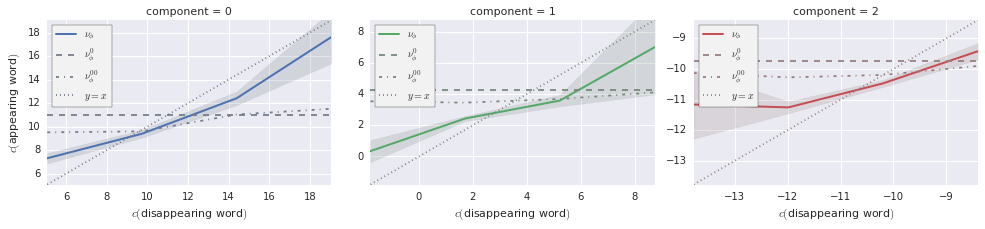

In [21]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On the features we expose in the paper

Compute the actual PCA

In [22]:
# Compute the PCA.
pcafeatures = tuple(sorted(PAPER_FEATURES))
pcavariations = variations[variations['feature'].map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 5 components.

Those explain the following variance:
[ 0.57073243  0.19276831  0.13719958  0.04067828  0.033683  ]

We're plotting variation for the first 3 components:


,aoa,clustering,frequency,letters_count,orthographic_density,synonyms_count
Component-0,0.744029,0.069263,-0.297121,0.541109,-0.246057,0.000172
Component-1,0.493356,0.102685,-0.327749,-0.761868,0.241051,0.009363
Component-2,0.441642,-0.087215,0.886450,-0.103098,0.013729,-0.027115


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [23]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 57703) |            | Elapsed Time: 0:00:12 ETA:  8 days, 9:12:35

  0% (  141 of 57703) |                    | Elapsed Time: 0:00:13 ETA:  0:06:40

  0% (  274 of 57703) |                    | Elapsed Time: 0:00:14 ETA:  0:06:49

  0% (  403 of 57703) |                    | Elapsed Time: 0:00:15 ETA:  0:06:56

  0% (  539 of 57703) |                    | Elapsed Time: 0:00:16 ETA:  0:06:54

  1% (  672 of 57703) |                    | Elapsed Time: 0:00:17 ETA:  0:06:54

  1% (  722 of 57703) |                    | Elapsed Time: 0:00:17 ETA:  0:06:52

  1% (  859 of 57703) |                    | Elapsed Time: 0:00:18 ETA:  0:06:50

  1% ( 1001 of 57703) |                    | Elapsed Time: 0:00:19 ETA:  0:06:46

  1% ( 1143 of 57703) |                    | Elapsed Time: 0:00:20 ETA:  0:06:42

  2% ( 1287 of 57703) |                    | Elapsed Time: 0:00:21 ETA:  0:06:40

  2% ( 1443 of 57703) |                    | Elapsed Time: 0:00:22 ETA:  0:06:28

  2% ( 1610 of 57703) |                    | Elapsed Time: 0:00:23 ETA:  0:06:15

  2% ( 1721 of 57703) |                    | Elapsed Time: 0:00:25 ETA:  0:06:23

  3% ( 1799 of 57703) |                    | Elapsed Time: 0:00:26 ETA:  0:06:46

  3% ( 1875 of 57703) |                    | Elapsed Time: 0:00:27 ETA:  0:07:11

  3% ( 1952 of 57703) |                    | Elapsed Time: 0:00:28 ETA:  0:07:41

  3% ( 2030 of 57703) |                    | Elapsed Time: 0:00:29 ETA:  0:08:16

  3% ( 2115 of 57703) |                    | Elapsed Time: 0:00:30 ETA:  0:08:53

  3% ( 2164 of 57703) |                    | Elapsed Time: 0:00:30 ETA:  0:09:17

  3% ( 2302 of 57703) |                    | Elapsed Time: 0:00:31 ETA:  0:08:51

  4% ( 2447 of 57703) |                    | Elapsed Time: 0:00:32 ETA:  0:09:04

  4% ( 2584 of 57703) |                    | Elapsed Time: 0:00:33 ETA:  0:08:45

  4% ( 2744 of 57703) |                    | Elapsed Time: 0:00:34 ETA:  0:07:56

  5% ( 2886 of 57703) |#                   | Elapsed Time: 0:00:35 ETA:  0:07:10

  5% ( 2992 of 57703) |#                   | Elapsed Time: 0:00:42 ETA:  0:12:43

  5% ( 3161 of 57703) |#                   | Elapsed Time: 0:00:43 ETA:  0:11:37

  5% ( 3335 of 57703) |#                   | Elapsed Time: 0:00:44 ETA:  0:10:41

  6% ( 3508 of 57703) |#                   | Elapsed Time: 0:00:45 ETA:  0:10:06

  6% ( 3607 of 57703) |#                   | Elapsed Time: 0:00:46 ETA:  0:10:06

  6% ( 3782 of 57703) |#                   | Elapsed Time: 0:00:47 ETA:  0:09:50

  6% ( 3954 of 57703) |#                   | Elapsed Time: 0:00:48 ETA:  0:09:33

  7% ( 4096 of 57703) |#                   | Elapsed Time: 0:00:49 ETA:  0:09:40

  7% ( 4236 of 57703) |#                   | Elapsed Time: 0:00:50 ETA:  0:09:49

  7% ( 4328 of 57703) |#                   | Elapsed Time: 0:00:50 ETA:  0:05:05

  7% ( 4468 of 57703) |#                   | Elapsed Time: 0:00:51 ETA:  0:05:12

  7% ( 4609 of 57703) |#                   | Elapsed Time: 0:00:52 ETA:  0:05:20

  8% ( 4754 of 57703) |#                   | Elapsed Time: 0:00:53 ETA:  0:05:28

  8% ( 4890 of 57703) |#                   | Elapsed Time: 0:00:54 ETA:  0:05:35

  8% ( 4996 of 57703) |#                   | Elapsed Time: 0:00:55 ETA:  0:05:56

  8% ( 5050 of 57703) |#                   | Elapsed Time: 0:00:56 ETA:  0:06:14

  8% ( 5126 of 57703) |#                   | Elapsed Time: 0:00:57 ETA:  0:06:41

  9% ( 5247 of 57703) |#                   | Elapsed Time: 0:00:58 ETA:  0:06:49

  9% ( 5383 of 57703) |#                   | Elapsed Time: 0:00:59 ETA:  0:06:47

  9% ( 5520 of 57703) |#                   | Elapsed Time: 0:01:00 ETA:  0:06:48

  9% ( 5667 of 57703) |#                   | Elapsed Time: 0:01:01 ETA:  0:06:44

  9% ( 5757 of 57703) |#                   | Elapsed Time: 0:01:02 ETA:  0:07:09

 10% ( 5771 of 57703) |##                  | Elapsed Time: 0:01:02 ETA:  0:07:26

 10% ( 5851 of 57703) |##                  | Elapsed Time: 0:01:03 ETA:  0:07:40

 10% ( 5927 of 57703) |##                  | Elapsed Time: 0:01:04 ETA:  0:07:59

 10% ( 6001 of 57703) |##                  | Elapsed Time: 0:01:05 ETA:  0:07:58

 10% ( 6117 of 57703) |##                  | Elapsed Time: 0:01:06 ETA:  0:08:00

 10% ( 6256 of 57703) |##                  | Elapsed Time: 0:01:07 ETA:  0:07:57

 11% ( 6357 of 57703) |##                  | Elapsed Time: 0:01:08 ETA:  0:08:19

 11% ( 6492 of 57703) |##                  | Elapsed Time: 0:01:09 ETA:  0:08:23

 11% ( 6640 of 57703) |##                  | Elapsed Time: 0:01:10 ETA:  0:07:45

 11% ( 6787 of 57703) |##                  | Elapsed Time: 0:01:11 ETA:  0:07:05

 12% ( 6942 of 57703) |##                  | Elapsed Time: 0:01:12 ETA:  0:06:26

 12% ( 7057 of 57703) |##                  | Elapsed Time: 0:01:13 ETA:  0:06:07

 12% ( 7173 of 57703) |##                  | Elapsed Time: 0:01:14 ETA:  0:06:07

 12% ( 7213 of 57703) |##                  | Elapsed Time: 0:01:14 ETA:  0:06:12

 12% ( 7329 of 57703) |##                  | Elapsed Time: 0:01:15 ETA:  0:06:04

 12% ( 7451 of 57703) |##                  | Elapsed Time: 0:01:16 ETA:  0:06:04

 13% ( 7569 of 57703) |##                  | Elapsed Time: 0:01:17 ETA:  0:06:10

 13% ( 7689 of 57703) |##                  | Elapsed Time: 0:01:19 ETA:  0:06:21

 13% ( 7815 of 57703) |##                  | Elapsed Time: 0:01:20 ETA:  0:06:29

 13% ( 7935 of 57703) |##                  | Elapsed Time: 0:01:20 ETA:  0:06:43

 13% ( 8057 of 57703) |##                  | Elapsed Time: 0:01:21 ETA:  0:06:38

 14% ( 8180 of 57703) |##                  | Elapsed Time: 0:01:22 ETA:  0:06:34

 14% ( 8301 of 57703) |##                  | Elapsed Time: 0:01:23 ETA:  0:06:32

 14% ( 8427 of 57703) |##                  | Elapsed Time: 0:01:24 ETA:  0:06:27

 14% ( 8551 of 57703) |##                  | Elapsed Time: 0:01:26 ETA:  0:06:26

 15% ( 8656 of 57703) |###                 | Elapsed Time: 0:01:26 ETA:  0:06:23

 15% ( 8778 of 57703) |###                 | Elapsed Time: 0:01:27 ETA:  0:06:22

 15% ( 8900 of 57703) |###                 | Elapsed Time: 0:01:28 ETA:  0:06:22

 15% ( 9024 of 57703) |###                 | Elapsed Time: 0:01:29 ETA:  0:06:21

 15% ( 9148 of 57703) |###                 | Elapsed Time: 0:01:30 ETA:  0:06:20

 16% ( 9290 of 57703) |###                 | Elapsed Time: 0:01:31 ETA:  0:06:11

 16% ( 9377 of 57703) |###                 | Elapsed Time: 0:01:32 ETA:  0:06:03

 16% ( 9518 of 57703) |###                 | Elapsed Time: 0:01:33 ETA:  0:05:55

 16% ( 9654 of 57703) |###                 | Elapsed Time: 0:01:34 ETA:  0:05:49

 16% ( 9786 of 57703) |###                 | Elapsed Time: 0:01:35 ETA:  0:05:44

 17% ( 9922 of 57703) |###                 | Elapsed Time: 0:01:36 ETA:  0:05:38

 17% (10057 of 57703) |###                 | Elapsed Time: 0:01:37 ETA:  0:05:32

 17% (10099 of 57703) |###                 | Elapsed Time: 0:01:37 ETA:  0:05:28

 17% (10226 of 57703) |###                 | Elapsed Time: 0:01:38 ETA:  0:05:25

 17% (10341 of 57703) |###                 | Elapsed Time: 0:01:39 ETA:  0:05:36

 18% (10460 of 57703) |###                 | Elapsed Time: 0:01:40 ETA:  0:05:43

 18% (10578 of 57703) |###                 | Elapsed Time: 0:01:41 ETA:  0:05:52

 18% (10702 of 57703) |###                 | Elapsed Time: 0:01:42 ETA:  0:05:56

 18% (10820 of 57703) |###                 | Elapsed Time: 0:01:43 ETA:  0:06:00

 18% (10940 of 57703) |###                 | Elapsed Time: 0:01:44 ETA:  0:06:07

 19% (11068 of 57703) |###                 | Elapsed Time: 0:01:45 ETA:  0:06:09

 19% (11200 of 57703) |###                 | Elapsed Time: 0:01:46 ETA:  0:06:05

 19% (11317 of 57703) |###                 | Elapsed Time: 0:01:47 ETA:  0:06:09

 19% (11450 of 57703) |###                 | Elapsed Time: 0:01:48 ETA:  0:06:00

 20% (11541 of 57703) |####                | Elapsed Time: 0:01:49 ETA:  0:05:54

 20% (11673 of 57703) |####                | Elapsed Time: 0:01:50 ETA:  0:05:47

 20% (11807 of 57703) |####                | Elapsed Time: 0:01:51 ETA:  0:05:42

 20% (11941 of 57703) |####                | Elapsed Time: 0:01:52 ETA:  0:05:36

 20% (12074 of 57703) |####                | Elapsed Time: 0:01:53 ETA:  0:05:29

 21% (12206 of 57703) |####                | Elapsed Time: 0:01:54 ETA:  0:05:27

 21% (12262 of 57703) |####                | Elapsed Time: 0:01:54 ETA:  0:05:25

 21% (12403 of 57703) |####                | Elapsed Time: 0:01:55 ETA:  0:05:14

 21% (12537 of 57703) |####                | Elapsed Time: 0:01:56 ETA:  0:05:12

 21% (12668 of 57703) |####                | Elapsed Time: 0:01:57 ETA:  0:05:13

 22% (12792 of 57703) |####                | Elapsed Time: 0:01:58 ETA:  0:05:15

 22% (12922 of 57703) |####                | Elapsed Time: 0:01:59 ETA:  0:05:15

 22% (12984 of 57703) |####                | Elapsed Time: 0:02:00 ETA:  0:05:15

 22% (13143 of 57703) |####                | Elapsed Time: 0:02:01 ETA:  0:05:03

 23% (13293 of 57703) |####                | Elapsed Time: 0:02:02 ETA:  0:04:55

 23% (13433 of 57703) |####                | Elapsed Time: 0:02:03 ETA:  0:04:54

 23% (13591 of 57703) |####                | Elapsed Time: 0:02:04 ETA:  0:04:47

 23% (13705 of 57703) |####                | Elapsed Time: 0:02:05 ETA:  0:04:38

 24% (13867 of 57703) |####                | Elapsed Time: 0:02:06 ETA:  0:04:27

 24% (13969 of 57703) |####                | Elapsed Time: 0:02:07 ETA:  0:04:33

 24% (14070 of 57703) |####                | Elapsed Time: 0:02:08 ETA:  0:04:42

 24% (14171 of 57703) |####                | Elapsed Time: 0:02:09 ETA:  0:04:55

 24% (14324 of 57703) |####                | Elapsed Time: 0:02:10 ETA:  0:04:56

 25% (14426 of 57703) |#####               | Elapsed Time: 0:02:10 ETA:  0:04:56

 25% (14585 of 57703) |#####               | Elapsed Time: 0:02:11 ETA:  0:04:48

 25% (14746 of 57703) |#####               | Elapsed Time: 0:02:12 ETA:  0:04:46

 25% (14900 of 57703) |#####               | Elapsed Time: 0:02:13 ETA:  0:04:46

 26% (15054 of 57703) |#####               | Elapsed Time: 0:02:14 ETA:  0:04:48

 26% (15148 of 57703) |#####               | Elapsed Time: 0:02:15 ETA:  0:04:33

 26% (15296 of 57703) |#####               | Elapsed Time: 0:02:16 ETA:  0:04:15

 26% (15413 of 57703) |#####               | Elapsed Time: 0:02:17 ETA:  0:04:09

 26% (15528 of 57703) |#####               | Elapsed Time: 0:02:18 ETA:  0:04:21

 27% (15642 of 57703) |#####               | Elapsed Time: 0:02:19 ETA:  0:04:32

 27% (15813 of 57703) |#####               | Elapsed Time: 0:02:20 ETA:  0:04:27

 27% (15869 of 57703) |#####               | Elapsed Time: 0:02:20 ETA:  0:04:30

 27% (16006 of 57703) |#####               | Elapsed Time: 0:02:21 ETA:  0:04:35

 27% (16140 of 57703) |#####               | Elapsed Time: 0:02:22 ETA:  0:04:41

 28% (16285 of 57703) |#####               | Elapsed Time: 0:02:23 ETA:  0:04:40

 28% (16454 of 57703) |#####               | Elapsed Time: 0:02:24 ETA:  0:04:31

 28% (16590 of 57703) |#####               | Elapsed Time: 0:02:25 ETA:  0:04:23

 28% (16727 of 57703) |#####               | Elapsed Time: 0:02:26 ETA:  0:04:15

 29% (16871 of 57703) |#####               | Elapsed Time: 0:02:27 ETA:  0:04:04

 29% (17042 of 57703) |#####               | Elapsed Time: 0:02:28 ETA:  0:04:03

 29% (17216 of 57703) |#####               | Elapsed Time: 0:02:29 ETA:  0:03:57

 30% (17311 of 57703) |######              | Elapsed Time: 0:02:30 ETA:  0:03:49

 30% (17485 of 57703) |######              | Elapsed Time: 0:02:31 ETA:  0:03:36

 30% (17659 of 57703) |######              | Elapsed Time: 0:02:32 ETA:  0:03:27

 30% (17830 of 57703) |######              | Elapsed Time: 0:02:33 ETA:  0:03:26

 31% (17994 of 57703) |######              | Elapsed Time: 0:02:34 ETA:  0:03:18

 31% (18033 of 57703) |######              | Elapsed Time: 0:02:34 ETA:  0:03:10

 31% (18204 of 57703) |######              | Elapsed Time: 0:02:35 ETA:  0:03:02

 31% (18354 of 57703) |######              | Elapsed Time: 0:02:36 ETA:  0:03:06

 32% (18522 of 57703) |######              | Elapsed Time: 0:02:37 ETA:  0:03:07

 32% (18660 of 57703) |######              | Elapsed Time: 0:02:38 ETA:  0:03:14

 32% (18754 of 57703) |######              | Elapsed Time: 0:02:39 ETA:  0:03:22

 32% (18923 of 57703) |######              | Elapsed Time: 0:02:40 ETA:  0:03:23

 33% (19083 of 57703) |######              | Elapsed Time: 0:02:41 ETA:  0:03:25

 33% (19232 of 57703) |######              | Elapsed Time: 0:02:42 ETA:  0:03:28

 33% (19412 of 57703) |######              | Elapsed Time: 0:02:43 ETA:  0:03:22

 33% (19475 of 57703) |######              | Elapsed Time: 0:02:43 ETA:  0:03:24

 34% (19658 of 57703) |######              | Elapsed Time: 0:02:44 ETA:  0:03:13

 34% (19837 of 57703) |######              | Elapsed Time: 0:02:45 ETA:  0:03:09

 34% (20010 of 57703) |######              | Elapsed Time: 0:02:46 ETA:  0:02:59

 34% (20163 of 57703) |######              | Elapsed Time: 0:02:47 ETA:  0:02:56

 35% (20197 of 57703) |#######             | Elapsed Time: 0:02:48 ETA:  0:03:00

 35% (20299 of 57703) |#######             | Elapsed Time: 0:02:49 ETA:  0:03:16

 35% (20420 of 57703) |#######             | Elapsed Time: 0:02:50 ETA:  0:03:24

 35% (20531 of 57703) |#######             | Elapsed Time: 0:02:51 ETA:  0:03:46

 35% (20645 of 57703) |#######             | Elapsed Time: 0:02:52 ETA:  0:03:59

 36% (20804 of 57703) |#######             | Elapsed Time: 0:02:53 ETA:  0:04:06

 36% (20918 of 57703) |#######             | Elapsed Time: 0:02:53 ETA:  0:04:23

 36% (21060 of 57703) |#######             | Elapsed Time: 0:02:54 ETA:  0:04:35

 36% (21217 of 57703) |#######             | Elapsed Time: 0:02:55 ETA:  0:04:33

 37% (21365 of 57703) |#######             | Elapsed Time: 0:02:56 ETA:  0:04:22

 37% (21474 of 57703) |#######             | Elapsed Time: 0:02:57 ETA:  0:04:18

 37% (21639 of 57703) |#######             | Elapsed Time: 0:02:59 ETA:  0:03:57

 37% (21786 of 57703) |#######             | Elapsed Time: 0:03:00 ETA:  0:03:43

 37% (21872 of 57703) |#######             | Elapsed Time: 0:03:01 ETA:  0:04:11

 38% (21991 of 57703) |#######             | Elapsed Time: 0:03:02 ETA:  0:04:15

 38% (22148 of 57703) |#######             | Elapsed Time: 0:03:03 ETA:  0:04:08

 38% (22268 of 57703) |#######             | Elapsed Time: 0:03:04 ETA:  0:04:22

 38% (22360 of 57703) |#######             | Elapsed Time: 0:03:04 ETA:  0:04:30

 38% (22490 of 57703) |#######             | Elapsed Time: 0:03:05 ETA:  0:04:20

 39% (22631 of 57703) |#######             | Elapsed Time: 0:03:06 ETA:  0:04:22

 39% (22779 of 57703) |#######             | Elapsed Time: 0:03:07 ETA:  0:04:15

 39% (22936 of 57703) |#######             | Elapsed Time: 0:03:08 ETA:  0:04:10

 40% (23082 of 57703) |########            | Elapsed Time: 0:03:09 ETA:  0:03:45

 40% (23205 of 57703) |########            | Elapsed Time: 0:03:10 ETA:  0:03:58

 40% (23324 of 57703) |########            | Elapsed Time: 0:03:11 ETA:  0:03:57

 40% (23468 of 57703) |########            | Elapsed Time: 0:03:12 ETA:  0:03:51

 40% (23603 of 57703) |########            | Elapsed Time: 0:03:13 ETA:  0:03:48

 41% (23758 of 57703) |########            | Elapsed Time: 0:03:14 ETA:  0:03:42

 41% (23803 of 57703) |########            | Elapsed Time: 0:03:15 ETA:  0:03:46

 41% (23947 of 57703) |########            | Elapsed Time: 0:03:16 ETA:  0:03:51

 41% (24108 of 57703) |########            | Elapsed Time: 0:03:17 ETA:  0:03:37

 42% (24246 of 57703) |########            | Elapsed Time: 0:03:18 ETA:  0:03:36

 42% (24359 of 57703) |########            | Elapsed Time: 0:03:19 ETA:  0:03:39

 42% (24524 of 57703) |########            | Elapsed Time: 0:03:20 ETA:  0:03:28

 42% (24689 of 57703) |########            | Elapsed Time: 0:03:21 ETA:  0:03:15

 43% (24841 of 57703) |########            | Elapsed Time: 0:03:22 ETA:  0:03:15

 43% (24990 of 57703) |########            | Elapsed Time: 0:03:23 ETA:  0:03:11

 43% (25141 of 57703) |########            | Elapsed Time: 0:03:24 ETA:  0:03:08

 43% (25246 of 57703) |########            | Elapsed Time: 0:03:25 ETA:  0:03:10

 44% (25397 of 57703) |########            | Elapsed Time: 0:03:26 ETA:  0:03:05

 44% (25541 of 57703) |########            | Elapsed Time: 0:03:27 ETA:  0:02:53

 44% (25704 of 57703) |########            | Elapsed Time: 0:03:28 ETA:  0:02:47

 44% (25866 of 57703) |########            | Elapsed Time: 0:03:29 ETA:  0:02:44

 45% (25967 of 57703) |#########           | Elapsed Time: 0:03:29 ETA:  0:02:50

 45% (26104 of 57703) |#########           | Elapsed Time: 0:03:30 ETA:  0:02:53

 45% (26253 of 57703) |#########           | Elapsed Time: 0:03:31 ETA:  0:02:52

 45% (26406 of 57703) |#########           | Elapsed Time: 0:03:32 ETA:  0:02:51

 46% (26557 of 57703) |#########           | Elapsed Time: 0:03:33 ETA:  0:02:50

 46% (26688 of 57703) |#########           | Elapsed Time: 0:03:34 ETA:  0:02:50

 46% (26840 of 57703) |#########           | Elapsed Time: 0:03:35 ETA:  0:02:47

 46% (26976 of 57703) |#########           | Elapsed Time: 0:03:36 ETA:  0:02:54

 47% (27125 of 57703) |#########           | Elapsed Time: 0:03:37 ETA:  0:02:57

 47% (27274 of 57703) |#########           | Elapsed Time: 0:03:38 ETA:  0:02:54

 47% (27384 of 57703) |#########           | Elapsed Time: 0:03:39 ETA:  0:03:01

 47% (27409 of 57703) |#########           | Elapsed Time: 0:03:39 ETA:  0:03:06

 47% (27530 of 57703) |#########           | Elapsed Time: 0:03:40 ETA:  0:03:16

 47% (27689 of 57703) |#########           | Elapsed Time: 0:03:42 ETA:  0:03:12

 48% (27773 of 57703) |#########           | Elapsed Time: 0:03:43 ETA:  0:03:36

 48% (27910 of 57703) |#########           | Elapsed Time: 0:03:44 ETA:  0:03:41

 48% (28050 of 57703) |#########           | Elapsed Time: 0:03:45 ETA:  0:03:38

 48% (28131 of 57703) |#########           | Elapsed Time: 0:03:45 ETA:  0:03:45

 48% (28269 of 57703) |#########           | Elapsed Time: 0:03:46 ETA:  0:03:50

 49% (28426 of 57703) |#########           | Elapsed Time: 0:03:47 ETA:  0:03:28

 49% (28521 of 57703) |#########           | Elapsed Time: 0:03:48 ETA:  0:03:40

 49% (28629 of 57703) |#########           | Elapsed Time: 0:03:49 ETA:  0:03:44

 49% (28755 of 57703) |#########           | Elapsed Time: 0:03:50 ETA:  0:03:57

 50% (28852 of 57703) |##########          | Elapsed Time: 0:03:51 ETA:  0:03:36

 50% (28990 of 57703) |##########          | Elapsed Time: 0:03:52 ETA:  0:03:34

 50% (29133 of 57703) |##########          | Elapsed Time: 0:03:53 ETA:  0:03:32

 50% (29257 of 57703) |##########          | Elapsed Time: 0:03:54 ETA:  0:03:34

 50% (29407 of 57703) |##########          | Elapsed Time: 0:03:55 ETA:  0:03:28

 51% (29573 of 57703) |##########          | Elapsed Time: 0:03:56 ETA:  0:03:15

 51% (29723 of 57703) |##########          | Elapsed Time: 0:03:57 ETA:  0:02:57

 51% (29855 of 57703) |##########          | Elapsed Time: 0:03:58 ETA:  0:02:54

 51% (29985 of 57703) |##########          | Elapsed Time: 0:03:59 ETA:  0:02:56

 52% (30125 of 57703) |##########          | Elapsed Time: 0:04:00 ETA:  0:02:54

 52% (30295 of 57703) |##########          | Elapsed Time: 0:04:01 ETA:  0:02:42

 52% (30427 of 57703) |##########          | Elapsed Time: 0:04:02 ETA:  0:02:48

 52% (30562 of 57703) |##########          | Elapsed Time: 0:04:03 ETA:  0:02:51

 53% (30697 of 57703) |##########          | Elapsed Time: 0:04:04 ETA:  0:02:54

 53% (30854 of 57703) |##########          | Elapsed Time: 0:04:05 ETA:  0:02:50

 53% (31016 of 57703) |##########          | Elapsed Time: 0:04:06 ETA:  0:02:40

 54% (31177 of 57703) |##########          | Elapsed Time: 0:04:07 ETA:  0:02:31

 54% (31331 of 57703) |##########          | Elapsed Time: 0:04:08 ETA:  0:02:29

 54% (31465 of 57703) |##########          | Elapsed Time: 0:04:09 ETA:  0:02:32

 54% (31586 of 57703) |##########          | Elapsed Time: 0:04:10 ETA:  0:02:35

 54% (31702 of 57703) |##########          | Elapsed Time: 0:04:11 ETA:  0:02:41

 55% (31737 of 57703) |###########         | Elapsed Time: 0:04:12 ETA:  0:02:36

 55% (31895 of 57703) |###########         | Elapsed Time: 0:04:13 ETA:  0:02:35

 55% (32050 of 57703) |###########         | Elapsed Time: 0:04:14 ETA:  0:02:28

 55% (32221 of 57703) |###########         | Elapsed Time: 0:04:15 ETA:  0:02:19

 56% (32394 of 57703) |###########         | Elapsed Time: 0:04:16 ETA:  0:02:14

 56% (32458 of 57703) |###########         | Elapsed Time: 0:04:16 ETA:  0:02:15

 56% (32583 of 57703) |###########         | Elapsed Time: 0:04:17 ETA:  0:02:17

 56% (32671 of 57703) |###########         | Elapsed Time: 0:04:18 ETA:  0:02:28

 56% (32801 of 57703) |###########         | Elapsed Time: 0:04:19 ETA:  0:02:22

 57% (32933 of 57703) |###########         | Elapsed Time: 0:04:20 ETA:  0:02:27

 57% (33071 of 57703) |###########         | Elapsed Time: 0:04:21 ETA:  0:02:33

 57% (33180 of 57703) |###########         | Elapsed Time: 0:04:22 ETA:  0:02:39

 57% (33323 of 57703) |###########         | Elapsed Time: 0:04:23 ETA:  0:02:48

 58% (33497 of 57703) |###########         | Elapsed Time: 0:04:24 ETA:  0:02:47

 58% (33647 of 57703) |###########         | Elapsed Time: 0:04:25 ETA:  0:02:43

 58% (33793 of 57703) |###########         | Elapsed Time: 0:04:26 ETA:  0:02:34

 58% (33901 of 57703) |###########         | Elapsed Time: 0:04:26 ETA:  0:02:10

 59% (34048 of 57703) |###########         | Elapsed Time: 0:04:27 ETA:  0:02:04

 59% (34190 of 57703) |###########         | Elapsed Time: 0:04:28 ETA:  0:02:00

 59% (34345 of 57703) |###########         | Elapsed Time: 0:04:29 ETA:  0:01:54

 59% (34467 of 57703) |###########         | Elapsed Time: 0:04:30 ETA:  0:01:57

 60% (34622 of 57703) |############        | Elapsed Time: 0:04:31 ETA:  0:01:51

 60% (34758 of 57703) |############        | Elapsed Time: 0:04:32 ETA:  0:02:02

 60% (34898 of 57703) |############        | Elapsed Time: 0:04:33 ETA:  0:02:04

 60% (35058 of 57703) |############        | Elapsed Time: 0:04:34 ETA:  0:01:58

 60% (35188 of 57703) |############        | Elapsed Time: 0:04:35 ETA:  0:02:06

 61% (35344 of 57703) |############        | Elapsed Time: 0:04:36 ETA:  0:01:58

 61% (35496 of 57703) |############        | Elapsed Time: 0:04:37 ETA:  0:01:54

 61% (35634 of 57703) |############        | Elapsed Time: 0:04:38 ETA:  0:01:58

 62% (35802 of 57703) |############        | Elapsed Time: 0:04:39 ETA:  0:01:44

 62% (35943 of 57703) |############        | Elapsed Time: 0:04:40 ETA:  0:01:49

 62% (36065 of 57703) |############        | Elapsed Time: 0:04:41 ETA:  0:01:48

 62% (36206 of 57703) |############        | Elapsed Time: 0:04:42 ETA:  0:01:46

 62% (36308 of 57703) |############        | Elapsed Time: 0:04:43 ETA:  0:02:03

 63% (36430 of 57703) |############        | Elapsed Time: 0:04:44 ETA:  0:02:05

 63% (36593 of 57703) |############        | Elapsed Time: 0:04:45 ETA:  0:02:06

 63% (36754 of 57703) |############        | Elapsed Time: 0:04:46 ETA:  0:02:02

 63% (36786 of 57703) |############        | Elapsed Time: 0:04:47 ETA:  0:02:01

 63% (36913 of 57703) |############        | Elapsed Time: 0:04:48 ETA:  0:02:14

 64% (37079 of 57703) |############        | Elapsed Time: 0:04:49 ETA:  0:02:04

 64% (37222 of 57703) |############        | Elapsed Time: 0:04:50 ETA:  0:02:01

 64% (37392 of 57703) |############        | Elapsed Time: 0:04:51 ETA:  0:01:50

 65% (37507 of 57703) |#############       | Elapsed Time: 0:04:51 ETA:  0:01:32

 65% (37670 of 57703) |#############       | Elapsed Time: 0:04:52 ETA:  0:01:18

 65% (37827 of 57703) |#############       | Elapsed Time: 0:04:53 ETA:  0:01:19

 65% (37971 of 57703) |#############       | Elapsed Time: 0:04:54 ETA:  0:01:24

 66% (38142 of 57703) |#############       | Elapsed Time: 0:04:55 ETA:  0:01:17

 66% (38229 of 57703) |#############       | Elapsed Time: 0:04:56 ETA:  0:01:11

 66% (38392 of 57703) |#############       | Elapsed Time: 0:04:57 ETA:  0:01:10

 66% (38546 of 57703) |#############       | Elapsed Time: 0:04:58 ETA:  0:01:06

 67% (38668 of 57703) |#############       | Elapsed Time: 0:04:59 ETA:  0:01:19

 67% (38783 of 57703) |#############       | Elapsed Time: 0:05:00 ETA:  0:01:30

 67% (38917 of 57703) |#############       | Elapsed Time: 0:05:01 ETA:  0:01:38

 67% (38950 of 57703) |#############       | Elapsed Time: 0:05:01 ETA:  0:01:42

 67% (39095 of 57703) |#############       | Elapsed Time: 0:05:02 ETA:  0:01:41

 67% (39231 of 57703) |#############       | Elapsed Time: 0:05:03 ETA:  0:01:52

 68% (39364 of 57703) |#############       | Elapsed Time: 0:05:04 ETA:  0:01:54

 68% (39545 of 57703) |#############       | Elapsed Time: 0:05:05 ETA:  0:01:47

 68% (39634 of 57703) |#############       | Elapsed Time: 0:05:06 ETA:  0:02:11

 68% (39671 of 57703) |#############       | Elapsed Time: 0:05:07 ETA:  0:02:17

 69% (39825 of 57703) |#############       | Elapsed Time: 0:05:08 ETA:  0:01:59

 69% (39974 of 57703) |#############       | Elapsed Time: 0:05:09 ETA:  0:01:52

 69% (40120 of 57703) |#############       | Elapsed Time: 0:05:10 ETA:  0:01:49

 69% (40231 of 57703) |#############       | Elapsed Time: 0:05:11 ETA:  0:02:00

 69% (40353 of 57703) |#############       | Elapsed Time: 0:05:12 ETA:  0:02:05

 70% (40393 of 57703) |##############      | Elapsed Time: 0:05:12 ETA:  0:02:18

 70% (40501 of 57703) |##############      | Elapsed Time: 0:05:13 ETA:  0:02:50

 70% (40637 of 57703) |##############      | Elapsed Time: 0:05:14 ETA:  0:02:26

 70% (40788 of 57703) |##############      | Elapsed Time: 0:05:15 ETA:  0:02:06

 70% (40933 of 57703) |##############      | Elapsed Time: 0:05:16 ETA:  0:02:08

 71% (41114 of 57703) |##############      | Elapsed Time: 0:05:17 ETA:  0:02:08

 71% (41249 of 57703) |##############      | Elapsed Time: 0:05:18 ETA:  0:01:56

 71% (41368 of 57703) |##############      | Elapsed Time: 0:05:19 ETA:  0:01:57

 71% (41507 of 57703) |##############      | Elapsed Time: 0:05:20 ETA:  0:01:41

 72% (41633 of 57703) |##############      | Elapsed Time: 0:05:21 ETA:  0:01:33

 72% (41835 of 57703) |##############      | Elapsed Time: 0:05:23 ETA:  0:01:21

 72% (41960 of 57703) |##############      | Elapsed Time: 0:05:24 ETA:  0:01:29

 72% (42081 of 57703) |##############      | Elapsed Time: 0:05:25 ETA:  0:01:43

 73% (42223 of 57703) |##############      | Elapsed Time: 0:05:26 ETA:  0:01:42

 73% (42394 of 57703) |##############      | Elapsed Time: 0:05:27 ETA:  0:01:27

 73% (42556 of 57703) |##############      | Elapsed Time: 0:05:28 ETA:  0:01:09

 74% (42703 of 57703) |##############      | Elapsed Time: 0:05:29 ETA:  0:01:05

 74% (42842 of 57703) |##############      | Elapsed Time: 0:05:30 ETA:  0:01:00

 74% (42977 of 57703) |##############      | Elapsed Time: 0:05:31 ETA:  0:01:09

 74% (43112 of 57703) |##############      | Elapsed Time: 0:05:32 ETA:  0:01:14

 74% (43247 of 57703) |##############      | Elapsed Time: 0:05:33 ETA:  0:01:09

 75% (43278 of 57703) |###############     | Elapsed Time: 0:05:33 ETA:  0:01:01

 75% (43438 of 57703) |###############     | Elapsed Time: 0:05:34 ETA:  0:00:54

 75% (43571 of 57703) |###############     | Elapsed Time: 0:05:35 ETA:  0:01:06

 75% (43708 of 57703) |###############     | Elapsed Time: 0:05:36 ETA:  0:01:15

 76% (43865 of 57703) |###############     | Elapsed Time: 0:05:37 ETA:  0:01:11

 76% (43999 of 57703) |###############     | Elapsed Time: 0:05:38 ETA:  0:01:19

 76% (44140 of 57703) |###############     | Elapsed Time: 0:05:39 ETA:  0:01:16

 76% (44271 of 57703) |###############     | Elapsed Time: 0:05:40 ETA:  0:01:17

 76% (44407 of 57703) |###############     | Elapsed Time: 0:05:41 ETA:  0:01:18

 77% (44583 of 57703) |###############     | Elapsed Time: 0:05:42 ETA:  0:01:11

 77% (44720 of 57703) |###############     | Elapsed Time: 0:05:43 ETA:  0:01:16

 77% (44878 of 57703) |###############     | Elapsed Time: 0:05:44 ETA:  0:01:14

 78% (45029 of 57703) |###############     | Elapsed Time: 0:05:45 ETA:  0:00:55

 78% (45194 of 57703) |###############     | Elapsed Time: 0:05:46 ETA:  0:00:48

 78% (45341 of 57703) |###############     | Elapsed Time: 0:05:47 ETA:  0:00:45

 78% (45442 of 57703) |###############     | Elapsed Time: 0:05:48 ETA:  0:00:33

 79% (45623 of 57703) |###############     | Elapsed Time: 0:05:49 ETA:  0:00:18

 79% (45731 of 57703) |###############     | Elapsed Time: 0:05:50 ETA:  0:00:39

 79% (45856 of 57703) |###############     | Elapsed Time: 0:05:51 ETA:  0:00:32

 79% (46012 of 57703) |###############     | Elapsed Time: 0:05:52 ETA:  0:00:31

 80% (46163 of 57703) |################    | Elapsed Time: 0:05:53 ETA:  0:00:27

 80% (46313 of 57703) |################    | Elapsed Time: 0:05:54 ETA:  0:00:27

 80% (46402 of 57703) |################    | Elapsed Time: 0:05:55 ETA:  0:00:50

 80% (46520 of 57703) |################    | Elapsed Time: 0:05:56 ETA:  0:00:59

 80% (46679 of 57703) |################    | Elapsed Time: 0:05:57 ETA:  0:00:59

 81% (46835 of 57703) |################    | Elapsed Time: 0:05:58 ETA:  0:01:06

 81% (46884 of 57703) |################    | Elapsed Time: 0:05:58 ETA:  0:00:59

 81% (47048 of 57703) |################    | Elapsed Time: 0:05:59 ETA:  0:00:44

 81% (47198 of 57703) |################    | Elapsed Time: 0:06:00 ETA:  0:00:45

 82% (47370 of 57703) |################    | Elapsed Time: 0:06:01 ETA:  0:00:43

 82% (47527 of 57703) |################    | Elapsed Time: 0:06:02 ETA:  0:00:39

 82% (47605 of 57703) |################    | Elapsed Time: 0:06:03 ETA:  0:00:25

 82% (47758 of 57703) |################    | Elapsed Time: 0:06:04 ETA:  0:00:13

 83% (47928 of 57703) |################    | Elapsed Time: 0:06:05 ETA:  0:00:09

 83% (48084 of 57703) |################    | Elapsed Time: 0:06:06 ETA:  0:00:08

 83% (48217 of 57703) |################    | Elapsed Time: 0:06:07 ETA:  0:00:08

 83% (48327 of 57703) |################    | Elapsed Time: 0:06:08 ETA:  0:00:15

 84% (48474 of 57703) |################    | Elapsed Time: 0:06:09 ETA:  0:00:15

 84% (48633 of 57703) |################    | Elapsed Time: 0:06:10 ETA:  0:00:18

 84% (48793 of 57703) |################    | Elapsed Time: 0:06:11 ETA:  0:00:16

 84% (48946 of 57703) |################    | Elapsed Time: 0:06:12 ETA:  0:00:08

 85% (49048 of 57703) |#################   | Elapsed Time: 0:06:12 ETA:  0:00:12

 85% (49207 of 57703) |#################   | Elapsed Time: 0:06:13 ETA:  0:00:15

 85% (49361 of 57703) |#################   | Elapsed Time: 0:06:14 ETA:  0:00:14

 85% (49538 of 57703) |#################   | Elapsed Time: 0:06:15 ETA:  0:00:00

 86% (49697 of 57703) |#################   | Elapsed Time: 0:06:16 ETA:  0:00:00

 86% (49769 of 57703) |#################   | Elapsed Time: 0:06:17 ETA:  0:00:00

 86% (49945 of 57703) |#################   | Elapsed Time: 0:06:18 ETA:  0:00:00

 86% (50113 of 57703) |#################   | Elapsed Time: 0:06:19 ETA:  0:00:00

 87% (50273 of 57703) |#################   | Elapsed Time: 0:06:20 ETA:  0:00:00

 87% (50430 of 57703) |#################   | Elapsed Time: 0:06:21 ETA:  0:00:00

 87% (50491 of 57703) |#################   | Elapsed Time: 0:06:21 ETA:  0:00:00

 87% (50674 of 57703) |#################   | Elapsed Time: 0:06:22 ETA:  0:00:00

 88% (50853 of 57703) |#################   | Elapsed Time: 0:06:23 ETA:  0:00:00

 88% (50963 of 57703) |#################   | Elapsed Time: 0:06:24 ETA:  0:00:00

 88% (51125 of 57703) |#################   | Elapsed Time: 0:06:25 ETA:  0:00:00

 88% (51212 of 57703) |#################   | Elapsed Time: 0:06:26 ETA:  0:00:00

 88% (51337 of 57703) |#################   | Elapsed Time: 0:06:27 ETA:  0:00:00

 89% (51496 of 57703) |#################   | Elapsed Time: 0:06:28 ETA:  0:00:00

 89% (51663 of 57703) |#################   | Elapsed Time: 0:06:29 ETA:  0:00:00

 89% (51808 of 57703) |#################   | Elapsed Time: 0:06:30 ETA:  0:00:00

 90% (51933 of 57703) |##################  | Elapsed Time: 0:06:31 ETA:  0:00:00

 90% (52100 of 57703) |##################  | Elapsed Time: 0:06:32 ETA:  0:00:00

 90% (52265 of 57703) |##################  | Elapsed Time: 0:06:33 ETA:  0:00:00

 90% (52415 of 57703) |##################  | Elapsed Time: 0:06:34 ETA:  0:00:00

 91% (52552 of 57703) |##################  | Elapsed Time: 0:06:35 ETA:  0:00:00

 91% (52654 of 57703) |##################  | Elapsed Time: 0:06:36 ETA:  0:00:00

 91% (52792 of 57703) |##################  | Elapsed Time: 0:06:37 ETA:  0:00:00

 91% (52956 of 57703) |##################  | Elapsed Time: 0:06:38 ETA:  0:00:00

 92% (53136 of 57703) |##################  | Elapsed Time: 0:06:39 ETA:  0:00:00

 92% (53293 of 57703) |##################  | Elapsed Time: 0:06:40 ETA:  0:00:00

 92% (53376 of 57703) |##################  | Elapsed Time: 0:06:40 ETA:  0:00:00

 92% (53537 of 57703) |##################  | Elapsed Time: 0:06:41 ETA:  0:00:00

 93% (53675 of 57703) |##################  | Elapsed Time: 0:06:42 ETA:  0:00:00

 93% (53807 of 57703) |##################  | Elapsed Time: 0:06:43 ETA:  0:00:00

 93% (53953 of 57703) |##################  | Elapsed Time: 0:06:44 ETA:  0:00:00

 93% (54097 of 57703) |##################  | Elapsed Time: 0:06:45 ETA:  0:00:00

 94% (54248 of 57703) |##################  | Elapsed Time: 0:06:46 ETA:  0:00:00

 94% (54421 of 57703) |##################  | Elapsed Time: 0:06:47 ETA:  0:00:00

 94% (54574 of 57703) |##################  | Elapsed Time: 0:06:48 ETA:  0:00:00

 94% (54733 of 57703) |##################  | Elapsed Time: 0:06:49 ETA:  0:00:00

 95% (54818 of 57703) |################### | Elapsed Time: 0:06:50 ETA:  0:00:00

 95% (54971 of 57703) |################### | Elapsed Time: 0:06:51 ETA:  0:00:00

 95% (55133 of 57703) |################### | Elapsed Time: 0:06:52 ETA:  0:00:00

 95% (55277 of 57703) |################### | Elapsed Time: 0:06:53 ETA:  0:00:00

 96% (55435 of 57703) |################### | Elapsed Time: 0:06:54 ETA:  0:00:00

 96% (55540 of 57703) |################### | Elapsed Time: 0:06:54 ETA:  0:00:00

 96% (55702 of 57703) |################### | Elapsed Time: 0:06:55 ETA:  0:00:00

 96% (55858 of 57703) |################### | Elapsed Time: 0:06:56 ETA:  0:00:00

 97% (55996 of 57703) |################### | Elapsed Time: 0:06:57 ETA:  0:00:00

 97% (56141 of 57703) |################### | Elapsed Time: 0:06:58 ETA:  0:00:00

 97% (56261 of 57703) |################### | Elapsed Time: 0:06:59 ETA:  0:00:00

 97% (56405 of 57703) |################### | Elapsed Time: 0:07:00 ETA:  0:00:00

 98% (56566 of 57703) |################### | Elapsed Time: 0:07:01 ETA:  0:00:00

 98% (56739 of 57703) |################### | Elapsed Time: 0:07:02 ETA:  0:00:00

 98% (56901 of 57703) |################### | Elapsed Time: 0:07:03 ETA:  0:00:00

 98% (56982 of 57703) |################### | Elapsed Time: 0:07:04 ETA:  0:00:00

 99% (57126 of 57703) |################### | Elapsed Time: 0:07:05 ETA:  0:00:00

 99% (57286 of 57703) |################### | Elapsed Time: 0:07:06 ETA:  0:00:00

 99% (57443 of 57703) |################### | Elapsed Time: 0:07:07 ETA:  0:00:00

 99% (57610 of 57703) |################### | Elapsed Time: 0:07:08 ETA:  0:00:00

100% (57703 of 57703) |####################| Elapsed Time: 0:07:08 Time: 0:07:08


Compute cluster averages (so as not to overestimate confidence intervals).

In [24]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components

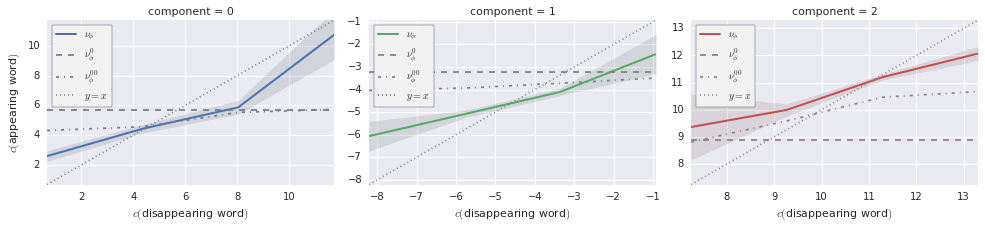

In [25]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `PAPER_FEATURES`). So note the following:

In [26]:
for feature in PAPER_FEATURES:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature) for feature in PAPER_FEATURES]:
    words.update(tfeature())

data = dict((feature, []) for feature in PAPER_FEATURES)
words_list = []
for word in words:
    words_list.append(word)
    for feature in PAPER_FEATURES:
        data[feature].append(Substitution._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'clustering' is based on 5739 words.
Feature 'letters_count' is based on 42786 words.
Feature 'synonyms_count' is based on 147306 words.
Feature 'orthographic_density' is based on 27751 words.



Among all the set of words used by these features, only 3322 are used.

Similarly, we mined 1493 (cluster-unique) substitutions, but the PCA is in fact computed on 570 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.